<a href="https://colab.research.google.com/github/ivansudibyo14/intermediate/blob/main/advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime as dt
now = dt.datetime(2021,11,2)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statistics

In [ ]:
user_url='https://docs.google.com/spreadsheets/d/1zffM3fez08DZKOl8dfX5I1AEiGdpLxkcXziVInPHJCA/edit#gid=320294525'
user_trf=user_url.replace('/edit#gid=', '/export?format=csv&gid=')
user=pd.read_csv(user_trf)
user

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 1:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 7:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 9:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [ ]:
user['user_id'] = user['user_id'].astype(str)


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  object
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(1), object(7)
memory usage: 919.6+ KB


In [ ]:
jkse_url='https://docs.google.com/spreadsheets/d/1JXfvDnPOqdj2-BplGdfJtKOZlVcwcz-VcUrnu8H9KTU/edit#gid=103801788'
jkse_trf=jkse_url.replace('/edit#gid=', '/export?format=csv&gid=')
jkse=pd.read_csv(jkse_trf)

jkse['date'] = pd.to_datetime(jkse['date'])


jkse

,date,Open,High,Low,Close,Adj_Close,Volume
0,2021-08-02,6098.01,6112.83,6048.10,6096.54,6096.54,216299000
1,2021-08-03,6108.00,6142.52,6105.11,6130.57,6130.57,226801300
2,2021-08-04,6142.48,6163.81,6112.72,6159.04,6159.04,271201100
3,2021-08-05,6174.61,6218.65,6173.57,6205.42,6205.42,268332500
4,2021-08-06,6223.83,6263.54,6190.86,6203.43,6203.43,245459900
...,...,...,...,...,...,...,...
57,2021-10-25,6626.37,6673.52,6625.70,6625.70,6625.70,175632400
58,2021-10-26,6640.05,6680.12,6638.03,6656.94,6656.94,180194900
59,2021-10-27,6664.37,6670.81,6590.50,6602.21,6602.21,182503600
60,2021-10-28,6578.58,6600.25,6509.88,6524.08,6524.08,189347200


In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/18JMaWlLz2AxUaL4zbWfO9LcmyZbr-gh7SD86FcU_hoo/edit#gid=1012731374'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,NaN,NaN,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,0.0,NaN,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,0.0,NaN,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,0.0,NaN,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              401239 non-null  int64  
 1   date                                 401239 non-null  object 
 2   Saham_AUM                            266863 non-null  float64
 3   Saham_invested_amount                266863 non-null  float64
 4   Saham_transaction_amount             257119 non-null  float64
 5   Pasar_Uang_AUM                       331442 non-null  float64
 6   Pasar_Uang_invested_amount           331442 non-null  float64
 7   Pasar_Uang_transaction_amount        319287 non-null  float64
 8   Pendapatan_Tetap_AUM                 263801 non-null  float64
 9   Pendapatan_Tetap_invested_amount     263801 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  254347 non-null  float64
 11  Campuran_AUM 

In [ ]:
USDIDR_url = 'https://docs.google.com/spreadsheets/d/1EiuqpG_oFceRSx7_pwaah1Vre6bhoTBx2M8BjVkxSF0/edit#gid=89980244'
USDIDR_url_trf = USDIDR_url.replace('/edit#gid=', '/export?format=csv&gid=')
USDIDR = pd.read_csv(USDIDR_url_trf)
USDIDR['date'] = pd.to_datetime(USDIDR['date'])

USDIDR

,date,Open,High,Low,Close,USDIDR
0,2017-11-01,13552,13595,13537,13554,13554
1,2017-11-02,13551,13572,13506,13553,13553
2,2017-11-03,13540,13547,13453,13543,13543
3,2017-11-06,13480,13536,13480,13480,13480
4,2017-11-07,13484,13540,13479,13483,13483
...,...,...,...,...,...,...
1300,2022-10-26,15549,15616,15492,15549,15549
1301,2022-10-27,15503,15587,15475,15503,15503
1302,2022-10-28,15554,15574,15510,15554,15554
1303,2022-10-31,15549,15657,15545,15549,15549


In [ ]:
USDIDR1=USDIDR

In [ ]:
USDIDR1_filtered= USDIDR1[USDIDR1['Close'] != 0]
USDIDR1=USDIDR1_filtered

In [ ]:
USDIDR1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1304
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1303 non-null   datetime64[ns]
 1   Open    1303 non-null   int64         
 2   High    1303 non-null   int64         
 3   Low     1303 non-null   int64         
 4   Close   1303 non-null   int64         
 5   USDIDR  1303 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 71.3 KB


In [ ]:
USDIDR1.fillna(0)
USDIDR1 = USDIDR1.dropna(axis=1)
USDIDR1

,date,Open,High,Low,Close,USDIDR
0,2017-11-01,13552,13595,13537,13554,13554
1,2017-11-02,13551,13572,13506,13553,13553
2,2017-11-03,13540,13547,13453,13543,13543
3,2017-11-06,13480,13536,13480,13480,13480
4,2017-11-07,13484,13540,13479,13483,13483
...,...,...,...,...,...,...
1300,2022-10-26,15549,15616,15492,15549,15549
1301,2022-10-27,15503,15587,15475,15503,15503
1302,2022-10-28,15554,15574,15510,15554,15554
1303,2022-10-31,15549,15657,15545,15549,15549


In [ ]:
USDIDR1['Log_Ret'] = np.log(USDIDR1['Close'] / USDIDR1['Close'].shift(1))

In [ ]:
USDIDR1
USDIDR1.dropna()

,date,Open,High,Low,Close,USDIDR,Log_Ret
1,2017-11-02,13551,13572,13506,13553,13553,-0.000074
2,2017-11-03,13540,13547,13453,13543,13543,-0.000738
3,2017-11-06,13480,13536,13480,13480,13480,-0.004663
4,2017-11-07,13484,13540,13479,13483,13483,0.000223
5,2017-11-08,13515,13533,13487,13514,13514,0.002297
...,...,...,...,...,...,...,...
1300,2022-10-26,15549,15616,15492,15549,15549,-0.002441
1301,2022-10-27,15503,15587,15475,15503,15503,-0.002963
1302,2022-10-28,15554,15574,15510,15554,15554,0.003284
1303,2022-10-31,15549,15657,15545,15549,15549,-0.000322


In [ ]:
dfreturn= pd.pivot_table(USDIDR1, values=['Log_Ret'], index='date', aggfunc='sum')
dfreturn.dropna()
dfreturn

,Log_Ret
date,
2017-11-01,0.000000
2017-11-02,-0.000074
2017-11-03,-0.000738
2017-11-06,-0.004663
2017-11-07,0.000223
...,...
2022-10-26,-0.002441
2022-10-27,-0.002963
2022-10-28,0.003284


In [ ]:
window = 21
trd_days = 252
ann_factor = window/trd_days

USDIDR1['rlz_var'] = USDIDR1['Log_Ret'].rolling(window).var() * ann_factor
USDIDR1['Volatility'] = np.sqrt(USDIDR1['rlz_var'])

In [ ]:
import numpy as np, pandas as pd
import pickle
!pip install arch
import arch
from arch import arch_model
import matplotlib.pyplot as plt
import seaborn as sns

am = arch_model(dfreturn, mean = 'Constant', vol='GARCH', p=1, q=1)
res = am.fit(update_freq=5)
print(res.summary())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 8.5 MB/s 
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4924.841140535275
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Log_Ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4924.84
Distribution:                  Normal   AIC:                          -9841.68
Method:            Maximum Likelihood   BIC:                          -9820.99
                                        No. Observations:                 1303
Date:                Fri, Nov 04 2022   Df Residuals:                     1302
Time

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.844e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [ ]:
USDIDR1['Volatility'] 

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1300    0.001082
1301    0.001089
1302    0.001098
1303    0.001099
1304    0.001118
Name: Volatility, Length: 1303, dtype: float64

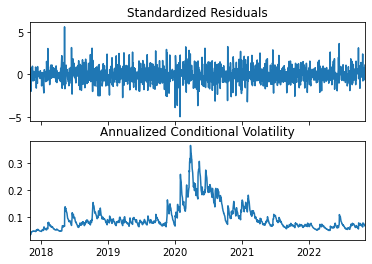

In [ ]:
fig = res.plot(annualize="D")

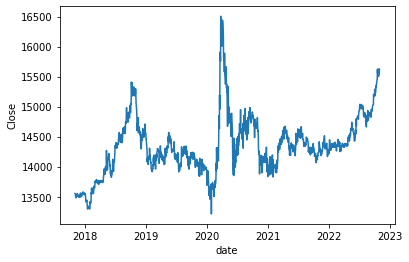

In [ ]:
sns.lineplot(x="date", y="Close", data=USDIDR1)
plt.show()

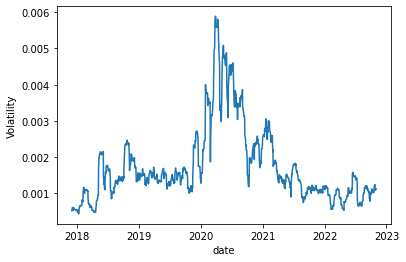

In [ ]:
sns.lineplot(x="date", y="Volatility", data=USDIDR1)
plt.show()

In [ ]:
#Convert String to Datetime
USDIDR1['date'] = pd.to_datetime(USDIDR1['date'])


In [ ]:
# check number of duplicated data
df.duplicated().sum()

0

In [ ]:
#Convert String to Datetime
df['date'] = pd.to_datetime(df['date'])

# Convert Integer value to string
df['user_id'] = df['user_id'].astype(str)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              401239 non-null  object        
 1   date                                 401239 non-null  datetime64[ns]
 2   Saham_AUM                            266863 non-null  float64       
 3   Saham_invested_amount                266863 non-null  float64       
 4   Saham_transaction_amount             257119 non-null  float64       
 5   Pasar_Uang_AUM                       331442 non-null  float64       
 6   Pasar_Uang_invested_amount           331442 non-null  float64       
 7   Pasar_Uang_transaction_amount        319287 non-null  float64       
 8   Pendapatan_Tetap_AUM                 263801 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     263801 non-null  float64       
 

In [ ]:
df['transaction']=(df['Saham_transaction_amount']+df['Pendapatan_Tetap_transaction_amount']+df['Pasar_Uang_transaction_amount']+df['Campuran_transaction_amount'])
df['profit_saham']=df['Saham_AUM']-df['Saham_invested_amount']
df['profit_pendapatan_tetap']=df['Pendapatan_Tetap_AUM']-df['Pendapatan_Tetap_invested_amount']
df['profit_pasar_uang']=df['Pasar_Uang_AUM']-df['Pasar_Uang_invested_amount']
df['profit_campuran']=df['Campuran_AUM']-df['Campuran_invested_amount']
df['profit']=(df['profit_saham']+df['profit_pendapatan_tetap']+df['profit_pasar_uang']+df['profit_campuran'])




In [ ]:
merge_v=df.merge(USDIDR1, how = 'inner', on='date')
merge_v.fillna("0", inplace = True)
merge_v.dropna()
merge_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401239 entries, 0 to 401238
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              401239 non-null  object        
 1   date                                 401239 non-null  datetime64[ns]
 2   Saham_AUM                            401239 non-null  object        
 3   Saham_invested_amount                401239 non-null  object        
 4   Saham_transaction_amount             401239 non-null  object        
 5   Pasar_Uang_AUM                       401239 non-null  object        
 6   Pasar_Uang_invested_amount           401239 non-null  object        
 7   Pasar_Uang_transaction_amount        401239 non-null  object        
 8   Pendapatan_Tetap_AUM                 401239 non-null  object        
 9   Pendapatan_Tetap_invested_amount     401239 non-null  object        
 

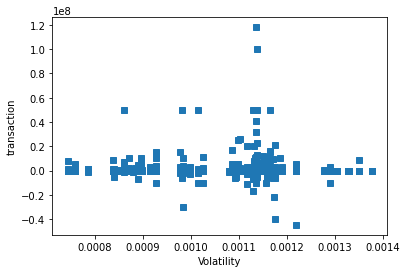

In [ ]:
from scipy import stats #<< Stats
import math
from statsmodels.stats.weightstats import ztest #<< Stats
from scipy.stats import chisquare #<< Stats

x=merge_v['Volatility']
y=merge_v['transaction']
x = merge_v['Volatility'].astype(float)
y = merge_v['transaction'].astype(float)
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s')
ax.set_xlabel('Volatility')
ax.set_ylabel('transaction')

plt.show()


In [ ]:
(r,p_value) = stats.pearsonr(x, y)
print('korelasi: ',r)
print('p-value:', p_value)

korelasi:  -6.115877359894268e-06
p-value: 0.9969090073022675


In [ ]:
dft = pd.pivot_table(df, values=['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], index='date', aggfunc='sum')
print(dft.round(2))

            Campuran_transaction_amount  Pasar_Uang_transaction_amount  \
date                                                                     
2021-08-04                          0.0                   0.000000e+00   
2021-08-05                          0.0                   2.030000e+06   
2021-08-06                    9000000.0                   1.475000e+06   
2021-08-09                   25500000.0                  -4.475000e+07   
2021-08-10                     100000.0                  -1.722873e+08   
...                                 ...                            ...   
2021-10-25                  -17589546.0                   1.781803e+08   
2021-10-26                    7900000.0                   1.824248e+07   
2021-10-27                   59925100.0                   1.472687e+07   
2021-10-28                   11807000.0                   1.311634e+09   
2021-10-29                    4500000.0                   1.334934e+08   

            Pendapatan_Tetap_transact

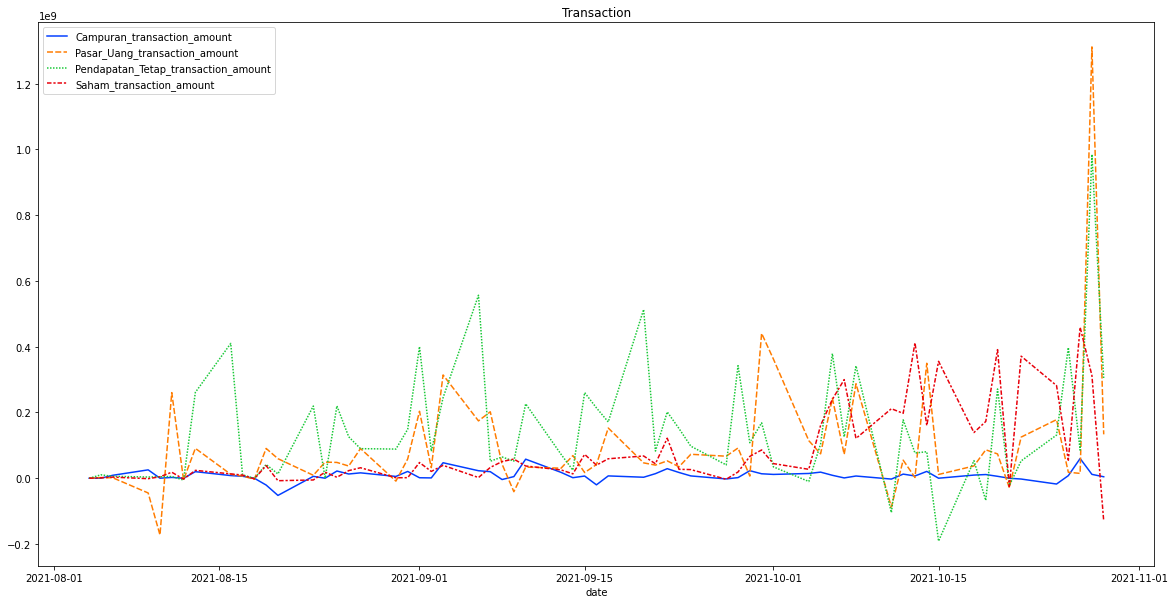

In [ ]:
fig = plt.figure(figsize=(20,10)) #ukuran canvas
sns.lineplot(data=dft, palette='bright')
plt.title('Transaction')
plt.show()

In [ ]:
df['week'] = df['date'].dt.week
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,transaction,profit_saham,profit_pendapatan_tetap,profit_pasar_uang,profit_campuran,profit,week
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,...,NaN,NaN,NaN,NaN,5066.0,72.0,8.0,NaN,NaN,40
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,...,NaN,NaN,NaN,NaN,5377.0,200.0,12.0,NaN,NaN,40
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,...,NaN,NaN,NaN,NaN,8188.0,-17.0,16.0,NaN,NaN,40
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,...,NaN,NaN,NaN,NaN,5988.0,-134.0,28.0,NaN,NaN,41
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,...,NaN,NaN,NaN,NaN,5988.0,-143.0,32.0,NaN,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,43
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,43
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,43
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,43


In [ ]:
df['month'] = df['date'].dt.month
df


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,transaction,profit_saham,profit_pendapatan_tetap,profit_pasar_uang,profit_campuran,profit,week,month
0,43195,2021-10-06,285066.0,280000.0,NaN,50008.0,50000.0,NaN,170072.0,170000.0,...,NaN,NaN,NaN,5066.0,72.0,8.0,NaN,NaN,40,10
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,...,NaN,NaN,NaN,5377.0,200.0,12.0,NaN,NaN,40,10
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,...,NaN,NaN,NaN,8188.0,-17.0,16.0,NaN,NaN,40,10
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,...,NaN,NaN,NaN,5988.0,-134.0,28.0,NaN,NaN,41,10
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,...,NaN,NaN,NaN,5988.0,-143.0,32.0,NaN,NaN,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,43,10
401235,4457532,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,43,10
401236,4457596,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,43,10
401237,4457622,2021-10-29,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,43,10


In [ ]:
df.fillna(0)

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,transaction,profit_saham,profit_pendapatan_tetap,profit_pasar_uang,profit_campuran,profit,week,month
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,0.0,0.0,0.0,5066.0,72.0,8.0,0.0,0.0,40,10
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,...,0.0,0.0,0.0,5377.0,200.0,12.0,0.0,0.0,40,10
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,...,0.0,0.0,0.0,8188.0,-17.0,16.0,0.0,0.0,40,10
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,...,0.0,0.0,0.0,5988.0,-134.0,28.0,0.0,0.0,41,10
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,...,0.0,0.0,0.0,5988.0,-143.0,32.0,0.0,0.0,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,10
401235,4457532,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,10
401236,4457596,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,10
401237,4457622,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              401239 non-null  object        
 1   date                                 401239 non-null  datetime64[ns]
 2   Saham_AUM                            266863 non-null  float64       
 3   Saham_invested_amount                266863 non-null  float64       
 4   Saham_transaction_amount             257119 non-null  float64       
 5   Pasar_Uang_AUM                       331442 non-null  float64       
 6   Pasar_Uang_invested_amount           331442 non-null  float64       
 7   Pasar_Uang_transaction_amount        319287 non-null  float64       
 8   Pendapatan_Tetap_AUM                 263801 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     263801 non-null  float64       
 

In [ ]:
df.describe()

,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,transaction,profit_saham,profit_pendapatan_tetap,profit_pasar_uang,profit_campuran,profit,week,month
count,2.668630e+05,2.668630e+05,2.571190e+05,3.314420e+05,3.314420e+05,3.192870e+05,2.638010e+05,2.638010e+05,2.543470e+05,1.121900e+04,1.121900e+04,1.089900e+04,4.423000e+03,2.668630e+05,2.638010e+05,3.314420e+05,1.121900e+04,4.589000e+03,401239.000000,401239.000000
mean,6.534363e+05,6.306310e+05,2.094648e+04,8.850296e+05,8.822011e+05,1.924543e+04,1.741940e+06,1.734287e+06,3.532171e+04,6.682698e+06,7.024128e+06,4.990911e+04,2.274472e+05,2.280532e+04,7.652362e+03,2.828527e+03,-3.414299e+05,1.004322e+05,39.628745,9.526826
std,4.581614e+06,4.460493e+06,1.224989e+06,1.580353e+07,1.574504e+07,1.919266e+06,2.137721e+07,2.124097e+07,2.180444e+06,2.152704e+07,2.305975e+07,1.286848e+06,3.531162e+06,2.071985e+05,1.621571e+05,6.350819e+04,1.709685e+06,9.998818e+05,2.845166,0.635631
min,0.000000e+00,0.000000e+00,-1.352592e+08,0.000000e+00,0.000000e+00,-1.850000e+08,0.000000e+00,0.000000e+00,-2.030100e+08,0.000000e+00,0.000000e+00,-5.000000e+07,-4.479490e+07,-8.922517e+06,-1.379176e+06,-5.725900e+04,-3.385722e+07,-3.280608e+06,31.000000,8.000000
25%,9.925000e+03,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.002800e+04,1.000000e+04,0.000000e+00,2.052150e+05,2.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.412255e+05,-2.102800e+04,38.000000,9.000000
50%,5.967200e+04,6.000000e+04,0.000000e+00,2.001500e+04,2.000000e+04,0.000000e+00,6.504800e+04,6.500000e+04,0.000000e+00,1.015296e+06,1.000000e+06,0.000000e+00,0.000000e+00,7.220000e+02,8.100000e+01,2.900000e+01,-2.569700e+04,3.923000e+03,40.000000,10.000000
75%,2.453185e+05,2.400000e+05,0.000000e+00,1.101100e+05,1.100000e+05,0.000000e+00,2.602830e+05,2.600000e+05,0.000000e+00,4.757745e+06,5.000000e+06,0.000000e+00,0.000000e+00,5.919000e+03,5.360000e+02,2.250000e+02,0.000000e+00,4.925700e+04,42.000000,10.000000
max,4.968963e+08,5.000000e+08,4.000000e+08,2.255630e+09,2.246548e+09,8.000000e+08,9.852591e+08,9.700000e+08,4.000000e+08,2.878238e+08,3.000000e+08,5.792510e+07,1.180000e+08,2.045267e+07,1.525907e+07,9.082590e+06,5.063350e+05,1.976821e+07,43.000000,10.000000


In [ ]:
df.fillna(0, inplace=True)

#handling outliers

In [ ]:
# 3902455
# 3726685
# 3764129
df_filtered = df[df['user_id'] != 3902455]
df_filtered1= df_filtered[df_filtered['user_id'] != 3726685]
df_filtered2= df_filtered1[df_filtered1['user_id'] != 3764129]

df=df_filtered2

#last AUM

In [ ]:
df21 = pd.pivot_table(df, values=['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM'], index=['user_id','month'], aggfunc='last')
print(df21.round(2))

               Campuran_AUM  Pasar_Uang_AUM  Pendapatan_Tetap_AUM  Saham_AUM
user_id month                                                               
100013  10              0.0       1000825.0             5306328.0  3593916.0
1000915 10              0.0             0.0             1007002.0        0.0
1002845 10              0.0         80121.0              135383.0   208031.0
1004326 8               0.0         20022.0               90365.0    91378.0
        9               0.0         20065.0               90558.0    94396.0
...                     ...             ...                   ...        ...
99245   10              0.0       1505444.0             3116650.0        0.0
995496  10              0.0             0.0                   0.0    39681.0
997938  8               0.0         50163.0                   0.0        0.0
        9               0.0        200752.0                   0.0   206161.0
        10              0.0        402092.0                   0.0   414301.0

#last invested amount

In [ ]:
df22 = pd.pivot_table(df, values=['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount'], index=['user_id','month'], aggfunc='last')
print(df22.round(2))

               Campuran_invested_amount  Pasar_Uang_invested_amount  \
user_id month                                                         
100013  10                          0.0                   1000000.0   
1000915 10                          0.0                         0.0   
1002845 10                          0.0                     80000.0   
1004326 8                           0.0                     20000.0   
        9                           0.0                     20000.0   
...                                 ...                         ...   
99245   10                          0.0                   1500000.0   
995496  10                          0.0                         0.0   
997938  8                           0.0                     50000.0   
        9                           0.0                    200000.0   
        10                          0.0                    400000.0   

               Pendapatan_Tetap_invested_amount  Saham_invested_amount  
use

#last profit

In [ ]:
df.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,transaction,profit_saham,profit_pendapatan_tetap,profit_pasar_uang,profit_campuran,profit,week,month
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,0.0,0.0,0.0,5066.0,72.0,8.0,0.0,0.0,40,10
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,...,0.0,0.0,0.0,5377.0,200.0,12.0,0.0,0.0,40,10
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,...,0.0,0.0,0.0,8188.0,-17.0,16.0,0.0,0.0,40,10
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,...,0.0,0.0,0.0,5988.0,-134.0,28.0,0.0,0.0,41,10
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,...,0.0,0.0,0.0,5988.0,-143.0,32.0,0.0,0.0,41,10


In [ ]:
df91 =pd.pivot_table(df, values=['profit_saham','profit_pasar_uang','profit_pendapatan_tetap','profit_campuran','profit'], index= ['user_id','month'], aggfunc='last')
print(df91.round(2))

               profit  profit_campuran  profit_pasar_uang  \
user_id month                                               
100013  10        0.0              0.0              825.0   
1000915 10        0.0              0.0                0.0   
1002845 10        0.0              0.0              121.0   
1004326 8         0.0              0.0               22.0   
        9         0.0              0.0               65.0   
...               ...              ...                ...   
99245   10        0.0              0.0             5444.0   
995496  10        0.0              0.0                0.0   
997938  8         0.0              0.0              163.0   
        9         0.0              0.0              752.0   
        10        0.0              0.0             2092.0   

               profit_pendapatan_tetap  profit_saham  
user_id month                                         
100013  10                      6328.0     -106084.0  
1000915 10                      7002.0   

In [ ]:
df92 =pd.pivot_table(df, values=['profit_saham','profit_pasar_uang','profit_pendapatan_tetap','profit_campuran','profit'], index= ['user_id','month'], aggfunc='first')
print(df92.round(2))

               profit  profit_campuran  profit_pasar_uang  \
user_id month                                               
100013  10        0.0              0.0              388.0   
1000915 10        0.0              0.0              563.0   
1002845 10        0.0              0.0               31.0   
1004326 8         0.0              0.0                4.0   
        9         0.0              0.0               23.0   
...               ...              ...                ...   
99245   10        0.0              0.0             1011.0   
995496  10        0.0              0.0                0.0   
997938  8         0.0              0.0               23.0   
        9         0.0              0.0              169.0   
        10        0.0              0.0              780.0   

               profit_pendapatan_tetap  profit_saham  
user_id month                                         
100013  10                      2522.0      -28446.0  
1000915 10                         0.0   

In [ ]:
dfp10 = df[df['month'] == 10] 


In [ ]:
dfp =pd.pivot_table(dfp10, values=['profit_saham','profit_pasar_uang','profit_pendapatan_tetap','profit_campuran','profit'], index= ['user_id','month'], aggfunc='last')
print(dfp.round(2))

               profit  profit_campuran  profit_pasar_uang  \
user_id month                                               
100013  10        0.0              0.0              825.0   
1000915 10        0.0              0.0                0.0   
1002845 10        0.0              0.0              121.0   
1004326 10        0.0              0.0              104.0   
1005053 10        0.0              0.0              130.0   
...               ...              ...                ...   
990725  10        0.0              0.0                0.0   
99119   10        0.0              0.0             1470.0   
99245   10        0.0              0.0             5444.0   
995496  10        0.0              0.0                0.0   
997938  10        0.0              0.0             2092.0   

               profit_pendapatan_tetap  profit_saham  
user_id month                                         
100013  10                      6328.0     -106084.0  
1000915 10                      7002.0   

In [ ]:
profit_total=pd.pivot_table(dfp10, values=['profit'], index= ['month'], aggfunc='sum')
profit_total


,profit
month,
10,505092734.0


In [ ]:
transaksi_total=pd.pivot_table(dfp10, values=['transaction'],index=['month'], aggfunc='sum')
transaksi_total

,transaction
month,
10,617767589.0


#percentage profit

In [ ]:
df93=df92/df91*100
df93.fillna(0, inplace=True)
df93.round(2)

profit  profit_campuran  profit_pasar_uang  \
user_id month                                               
100013  10        0.0              0.0              47.03   
1000915 10        0.0              0.0                inf   
1002845 10        0.0              0.0              25.62   
1004326 8         0.0              0.0              18.18   
        9         0.0              0.0              35.38   
...               ...              ...                ...   
99245   10        0.0              0.0              18.57   
995496  10        0.0              0.0               0.00   
997938  8         0.0              0.0              14.11   
        9         0.0              0.0              22.47   
        10        0.0              0.0              37.28   

               profit_pendapatan_tetap  profit_saham  
user_id month                                         
100013  10                       39.85         26.81  
1000915 10                        0.00          0.00  
1002845 10                        1.83        -19.20  
1004326 8                        27.12        -11.97  
        9                        65.95         17.11  
...                                ...           ...  
99245   10                       10.74          0.00  
995496  10                        0.00       -170.85  
997938  8                         0.00          0.00  
        9                         0.00          0.00  
        10                        0.00         31.82  

[26064 rows x 5 columns]

#user_vintage

In [ ]:
user_vintage1=pd.pivot_table(df, values=['month'], index= ['user_id'], aggfunc='first')

In [ ]:
user_vintage2=pd.pivot_table(df, values=['month'], index= ['user_id'], aggfunc='last')

In [ ]:
user_vintage_okt=user_vintage2-user_vintage1
user_vintage_okt = user_vintage_okt.sort_values('month', ascending=False)
user_vintage_okt

,month
user_id,
997938,2
3803029,2
3802180,2
3802203,2
3802282,2
...,...
4196212,0
4196184,0
4196109,0


In [ ]:
df

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_invested_amount,Campuran_transaction_amount,transaction,profit_saham,profit_pendapatan_tetap,profit_pasar_uang,profit_campuran,profit,week,month
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,0.0,0.0,0.0,5066.0,72.0,8.0,0.0,0.0,40,10
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,...,0.0,0.0,0.0,5377.0,200.0,12.0,0.0,0.0,40,10
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,...,0.0,0.0,0.0,8188.0,-17.0,16.0,0.0,0.0,40,10
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,...,0.0,0.0,0.0,5988.0,-134.0,28.0,0.0,0.0,41,10
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,...,0.0,0.0,0.0,5988.0,-143.0,32.0,0.0,0.0,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,10
401235,4457532,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,10
401236,4457596,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,10
401237,4457622,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43,10


In [ ]:
merge1 = df.merge(user, how = 'inner', on='user_id')

merge1

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,profit,week,month,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,0.0,40,10,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis
1,43195,2021-10-07,285377.0,280000.0,0.0,50012.0,50000.0,0.0,170200.0,170000.0,...,0.0,40,10,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis
2,43195,2021-10-08,288188.0,280000.0,0.0,50016.0,50000.0,0.0,169983.0,170000.0,...,0.0,40,10,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis
3,43195,2021-10-11,285988.0,280000.0,0.0,50028.0,50000.0,0.0,169866.0,170000.0,...,0.0,41,10,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis
4,43195,2021-10-12,285988.0,280000.0,0.0,50032.0,50000.0,0.0,169857.0,170000.0,...,0.0,41,10,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401234,4457509,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,43,10,2021-10-27 12:13:23,Male,39,Swasta,Rp 10 Juta - 50 Juta,used referral,Gaji
401235,4457532,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,43,10,2021-10-27 12:13:22,Female,41,Swasta,< 10 Juta,NaN,Gaji
401236,4457596,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,43,10,2021-10-27 12:13:21,Female,44,IRT,> Rp 50 Juta - 100 Juta,used referral,Keuntungan Bisnis
401237,4457622,2021-10-29,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,...,0.0,43,10,2021-10-27 12:35:21,Male,26,Pelajar,> Rp 50 Juta - 100 Juta,used referral,Gaji


In [ ]:
merge_4=merge1.merge(jkse, how = 'inner', on='date')

merge_4

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,user_occupation,user_income_range,referral_code_used,user_income_source,Open,High,Low,Close,Adj_Close,Volume
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis,6313.65,6441.50,6307.11,6417.32,6417.32,231440600
1,50701,2021-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji,6313.65,6441.50,6307.11,6417.32,6417.32,231440600
2,50961,2021-10-06,7512374.0,7110318.0,0.0,701179.0,700000.0,0.0,1400642.0,1400000.0,...,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,6313.65,6441.50,6307.11,6417.32,6417.32,231440600
3,51883,2021-10-06,53302.0,50000.0,0.0,10005.0,10000.0,0.0,40030.0,40000.0,...,Pelajar,> Rp 50 Juta - 100 Juta,NaN,Gaji,6313.65,6441.50,6307.11,6417.32,6417.32,231440600
4,53759,2021-10-06,75870.0,70000.0,0.0,10032.0,10000.0,0.0,20133.0,20000.0,...,Swasta,< 10 Juta,NaN,Gaji,6313.65,6441.50,6307.11,6417.32,6417.32,231440600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386151,3744886,2021-08-05,140765.0,140000.0,0.0,30004.0,30000.0,0.0,130085.0,130000.0,...,Pelajar,> Rp 50 Juta - 100 Juta,NaN,Gaji,6174.61,6218.65,6173.57,6205.42,6205.42,268332500
386152,3744989,2021-08-05,29838.0,30000.0,0.0,0.0,0.0,0.0,70025.0,70000.0,...,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,6174.61,6218.65,6173.57,6205.42,6205.42,268332500
386153,3745078,2021-08-05,0.0,0.0,0.0,70021.0,70000.0,0.0,100065.0,100000.0,...,Pelajar,< 10 Juta,used referral,Dari Orang Tua / Anak,6174.61,6218.65,6173.57,6205.42,6205.42,268332500
386154,3745167,2021-08-05,285134.0,280000.0,0.0,50017.0,50000.0,0.0,170111.0,170000.0,...,Pelajar,< 10 Juta,NaN,Gaji,6174.61,6218.65,6173.57,6205.42,6205.42,268332500


In [ ]:
merge_1=merge_4.drop(['Open','Close','High','Low','registration_import_datetime'], axis=1)
merge_1.fillna(0, inplace=True)

merge_1.round(2)

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,week,month,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Adj_Close,Volume
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,40,10,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,0,Keuntungan Bisnis,6417.32,231440600
1,50701,2021-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,10,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji,6417.32,231440600
2,50961,2021-10-06,7512374.0,7110318.0,0.0,701179.0,700000.0,0.0,1400642.0,1400000.0,...,40,10,Female,33,Swasta,> Rp 100 Juta - 500 Juta,0,Gaji,6417.32,231440600
3,51883,2021-10-06,53302.0,50000.0,0.0,10005.0,10000.0,0.0,40030.0,40000.0,...,40,10,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,0,Gaji,6417.32,231440600
4,53759,2021-10-06,75870.0,70000.0,0.0,10032.0,10000.0,0.0,20133.0,20000.0,...,40,10,Male,29,Swasta,< 10 Juta,0,Gaji,6417.32,231440600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386151,3744886,2021-08-05,140765.0,140000.0,0.0,30004.0,30000.0,0.0,130085.0,130000.0,...,31,8,Female,21,Pelajar,> Rp 50 Juta - 100 Juta,0,Gaji,6205.42,268332500
386152,3744989,2021-08-05,29838.0,30000.0,0.0,0.0,0.0,0.0,70025.0,70000.0,...,31,8,Male,57,Swasta,> Rp 50 Juta - 100 Juta,0,Gaji,6205.42,268332500
386153,3745078,2021-08-05,0.0,0.0,0.0,70021.0,70000.0,0.0,100065.0,100000.0,...,31,8,Female,23,Pelajar,< 10 Juta,used referral,Dari Orang Tua / Anak,6205.42,268332500
386154,3745167,2021-08-05,285134.0,280000.0,0.0,50017.0,50000.0,0.0,170111.0,170000.0,...,31,8,Male,22,Pelajar,< 10 Juta,0,Gaji,6205.42,268332500


In [ ]:
merge_5=merge_1.merge(USDIDR, how = 'inner', on='date')
merge_5

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,user_income_range,referral_code_used,user_income_source,Adj_Close,Volume,Open,High,Low,Close,USDIDR
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,> Rp 50 Juta - 100 Juta,0,Keuntungan Bisnis,6417.32,231440600,14245,14302,14206,14246,14246
1,50701,2021-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rp 10 Juta - 50 Juta,0,Gaji,6417.32,231440600,14245,14302,14206,14246,14246
2,50961,2021-10-06,7512374.0,7110318.0,0.0,701179.0,700000.0,0.0,1400642.0,1400000.0,...,> Rp 100 Juta - 500 Juta,0,Gaji,6417.32,231440600,14245,14302,14206,14246,14246
3,51883,2021-10-06,53302.0,50000.0,0.0,10005.0,10000.0,0.0,40030.0,40000.0,...,> Rp 50 Juta - 100 Juta,0,Gaji,6417.32,231440600,14245,14302,14206,14246,14246
4,53759,2021-10-06,75870.0,70000.0,0.0,10032.0,10000.0,0.0,20133.0,20000.0,...,< 10 Juta,0,Gaji,6417.32,231440600,14245,14302,14206,14246,14246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386151,3744886,2021-08-05,140765.0,140000.0,0.0,30004.0,30000.0,0.0,130085.0,130000.0,...,> Rp 50 Juta - 100 Juta,0,Gaji,6205.42,268332500,14374,14374,14306,14339,14339
386152,3744989,2021-08-05,29838.0,30000.0,0.0,0.0,0.0,0.0,70025.0,70000.0,...,> Rp 50 Juta - 100 Juta,0,Gaji,6205.42,268332500,14374,14374,14306,14339,14339
386153,3745078,2021-08-05,0.0,0.0,0.0,70021.0,70000.0,0.0,100065.0,100000.0,...,< 10 Juta,used referral,Dari Orang Tua / Anak,6205.42,268332500,14374,14374,14306,14339,14339
386154,3745167,2021-08-05,285134.0,280000.0,0.0,50017.0,50000.0,0.0,170111.0,170000.0,...,< 10 Juta,0,Gaji,6205.42,268332500,14374,14374,14306,14339,14339


In [ ]:
merge_6=merge_5.drop(['Open','Close','High','Low'], axis=1)
merge_6

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,month,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Adj_Close,Volume,USDIDR
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,10,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,0,Keuntungan Bisnis,6417.32,231440600,14246
1,50701,2021-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji,6417.32,231440600,14246
2,50961,2021-10-06,7512374.0,7110318.0,0.0,701179.0,700000.0,0.0,1400642.0,1400000.0,...,10,Female,33,Swasta,> Rp 100 Juta - 500 Juta,0,Gaji,6417.32,231440600,14246
3,51883,2021-10-06,53302.0,50000.0,0.0,10005.0,10000.0,0.0,40030.0,40000.0,...,10,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,0,Gaji,6417.32,231440600,14246
4,53759,2021-10-06,75870.0,70000.0,0.0,10032.0,10000.0,0.0,20133.0,20000.0,...,10,Male,29,Swasta,< 10 Juta,0,Gaji,6417.32,231440600,14246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386151,3744886,2021-08-05,140765.0,140000.0,0.0,30004.0,30000.0,0.0,130085.0,130000.0,...,8,Female,21,Pelajar,> Rp 50 Juta - 100 Juta,0,Gaji,6205.42,268332500,14339
386152,3744989,2021-08-05,29838.0,30000.0,0.0,0.0,0.0,0.0,70025.0,70000.0,...,8,Male,57,Swasta,> Rp 50 Juta - 100 Juta,0,Gaji,6205.42,268332500,14339
386153,3745078,2021-08-05,0.0,0.0,0.0,70021.0,70000.0,0.0,100065.0,100000.0,...,8,Female,23,Pelajar,< 10 Juta,used referral,Dari Orang Tua / Anak,6205.42,268332500,14339
386154,3745167,2021-08-05,285134.0,280000.0,0.0,50017.0,50000.0,0.0,170111.0,170000.0,...,8,Male,22,Pelajar,< 10 Juta,0,Gaji,6205.42,268332500,14339


In [ ]:
merge_1=merge_6

In [ ]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386156 entries, 0 to 386155
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              386156 non-null  object        
 1   date                                 386156 non-null  datetime64[ns]
 2   Saham_AUM                            386156 non-null  float64       
 3   Saham_invested_amount                386156 non-null  float64       
 4   Saham_transaction_amount             386156 non-null  float64       
 5   Pasar_Uang_AUM                       386156 non-null  float64       
 6   Pasar_Uang_invested_amount           386156 non-null  float64       
 7   Pasar_Uang_transaction_amount        386156 non-null  float64       
 8   Pendapatan_Tetap_AUM                 386156 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     386156 non-null  float64       
 

#K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
from yellowbrick.cluster import SilhouetteVisualizer    

In [ ]:
df_clust = merge_1

#handling outlier

In [ ]:
df_clust['user_id'] = df_clust['user_id'].astype(int)


In [ ]:
# 3902455
# 3726685
# 3764129
dfc_filtered = df_clust[df_clust['user_id'] != 3902455]
dfc_filtered1= dfc_filtered[dfc_filtered['user_id'] != 3726685]
dfc_filtered2= dfc_filtered1[dfc_filtered1['user_id'] != 3764129]

df_clust=dfc_filtered2
merge_1=df_clust

In [ ]:
df_clust

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,month,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Adj_Close,Volume,USDIDR
0,43195,2021-10-06,285066.0,280000.0,0.0,50008.0,50000.0,0.0,170072.0,170000.0,...,10,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,0,Keuntungan Bisnis,6417.32,231440600,14246
1,50701,2021-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,Female,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji,6417.32,231440600,14246
2,50961,2021-10-06,7512374.0,7110318.0,0.0,701179.0,700000.0,0.0,1400642.0,1400000.0,...,10,Female,33,Swasta,> Rp 100 Juta - 500 Juta,0,Gaji,6417.32,231440600,14246
3,51883,2021-10-06,53302.0,50000.0,0.0,10005.0,10000.0,0.0,40030.0,40000.0,...,10,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,0,Gaji,6417.32,231440600,14246
4,53759,2021-10-06,75870.0,70000.0,0.0,10032.0,10000.0,0.0,20133.0,20000.0,...,10,Male,29,Swasta,< 10 Juta,0,Gaji,6417.32,231440600,14246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386151,3744886,2021-08-05,140765.0,140000.0,0.0,30004.0,30000.0,0.0,130085.0,130000.0,...,8,Female,21,Pelajar,> Rp 50 Juta - 100 Juta,0,Gaji,6205.42,268332500,14339
386152,3744989,2021-08-05,29838.0,30000.0,0.0,0.0,0.0,0.0,70025.0,70000.0,...,8,Male,57,Swasta,> Rp 50 Juta - 100 Juta,0,Gaji,6205.42,268332500,14339
386153,3745078,2021-08-05,0.0,0.0,0.0,70021.0,70000.0,0.0,100065.0,100000.0,...,8,Female,23,Pelajar,< 10 Juta,used referral,Dari Orang Tua / Anak,6205.42,268332500,14339
386154,3745167,2021-08-05,285134.0,280000.0,0.0,50017.0,50000.0,0.0,170111.0,170000.0,...,8,Male,22,Pelajar,< 10 Juta,0,Gaji,6205.42,268332500,14339


In [ ]:
df_clust1 =pd.get_dummies(data=df_clust,columns=['user_occupation','user_income_range','user_income_source','user_gender','referral_code_used'])
df_clust1.drop(columns=['date','user_id','USDIDR','Volume','Adj_Close','week','month'], inplace=True)

df_clust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386004 entries, 0 to 386155
Data columns (total 48 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Saham_AUM                                   386004 non-null  float64
 1   Saham_invested_amount                       386004 non-null  float64
 2   Saham_transaction_amount                    386004 non-null  float64
 3   Pasar_Uang_AUM                              386004 non-null  float64
 4   Pasar_Uang_invested_amount                  386004 non-null  float64
 5   Pasar_Uang_transaction_amount               386004 non-null  float64
 6   Pendapatan_Tetap_AUM                        386004 non-null  float64
 7   Pendapatan_Tetap_invested_amount            386004 non-null  float64
 8   Pendapatan_Tetap_transaction_amount         386004 non-null  float64
 9   Campuran_AUM                                386004 non-null  float64
 

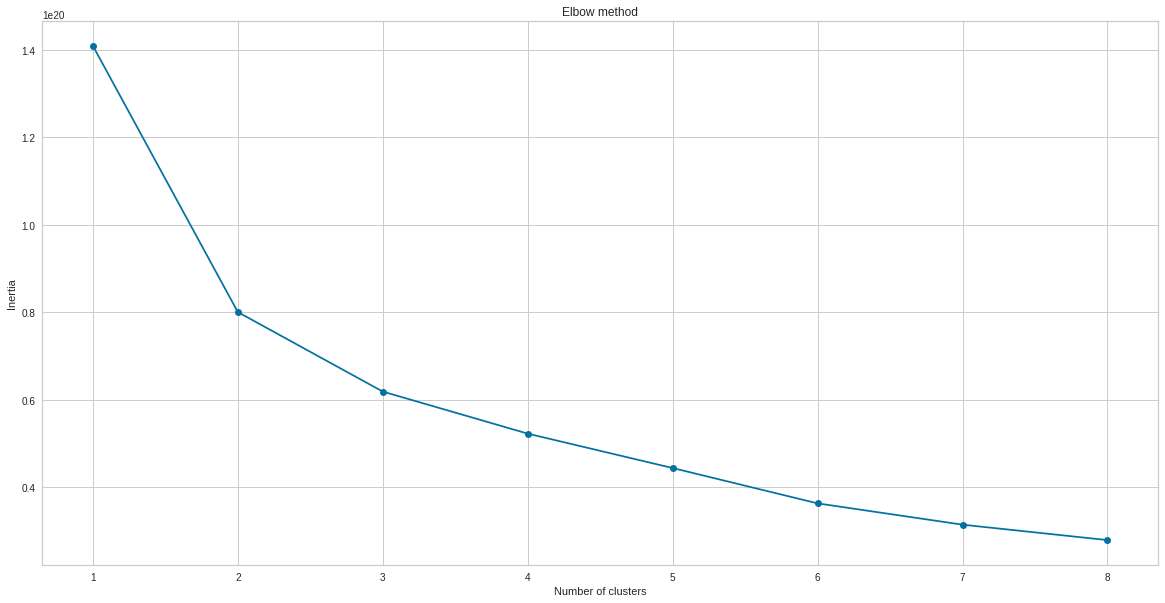

In [ ]:
inertias = []
plt.figure(figsize=(20,10))

for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_clust1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,9), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(df_clust1)
df_clust1['Cluster']=kmeans.labels_


In [ ]:
avg1 = df_clust1.groupby(['Cluster'],as_index=False).mean()
avg1.round(2)

,Cluster,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,...,user_income_source_Hasil Investasi,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan,user_gender_Female,user_gender_Male,referral_code_used_0,referral_code_used_used referral
0,0,358232.44,345874.20,9033.48,3.602992e+05,3.592408e+05,6650.20,4.102207e+05,4.088881e+05,5571.36,...,0.01,0.12,0.03,0.03,0.10,0.00,0.39,0.61,0.65,0.35
1,1,9713572.66,9549092.64,74871.04,8.863685e+06,8.841706e+06,-5213.27,3.196863e+08,3.182393e+08,8182593.73,...,0.16,0.44,0.00,0.01,0.16,0.13,0.39,0.61,0.45,0.55
2,2,5338503.06,5125000.00,37500.00,3.004648e+08,2.993227e+08,440063.76,2.926762e+08,2.916250e+08,6875000.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.31,1.00,0.00
3,3,13858913.90,13407789.02,772005.64,3.630671e+07,3.619031e+07,807746.30,5.718821e+07,5.697300e+07,1414054.40,...,0.00,0.22,0.03,0.03,0.03,0.00,0.53,0.47,0.58,0.42


In [ ]:
avg1.to_csv("kmeans10.csv")

In [ ]:
df_clust1.describe()

,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,...,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan,user_gender_Female,user_gender_Male,referral_code_used_0,referral_code_used_used referral,Cluster
count,3.860040e+05,3.860040e+05,3.860040e+05,3.860040e+05,3.860040e+05,3.860040e+05,3.860040e+05,3.860040e+05,3.860040e+05,3.860040e+05,...,386004.000000,386004.000000,386004.000000,386004.000000,386004.000000,386004.000000,386004.000000,386004.00000,386004.00000,386004.000000
mean,4.314615e+05,4.167982e+05,1.286647e+04,6.057573e+05,6.038778e+05,1.071408e+04,9.274400e+05,9.240369e+05,1.846340e+04,1.863223e+05,...,0.119380,0.029321,0.030230,0.102623,0.003034,0.385784,0.614216,0.64933,0.35067,0.015868
std,3.731031e+06,3.636834e+06,9.933045e+05,6.668436e+06,6.646358e+06,8.023017e+05,1.038484e+07,1.034271e+07,1.487839e+06,3.752207e+06,...,0.324235,0.168705,0.171221,0.303467,0.054995,0.486780,0.486780,0.47718,0.47718,0.214111
min,0.000000e+00,0.000000e+00,-1.352592e+08,0.000000e+00,0.000000e+00,-1.850000e+08,0.000000e+00,0.000000e+00,-2.030100e+08,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
50%,9.892000e+03,1.000000e+04,0.000000e+00,1.001700e+04,1.000000e+04,0.000000e+00,9.997000e+03,1.000000e+04,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.00000,0.000000
75%,1.084210e+05,1.000000e+05,0.000000e+00,1.001050e+05,1.000000e+05,0.000000e+00,1.100622e+05,1.100000e+05,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.00000,0.000000
max,4.968963e+08,5.000000e+08,4.000000e+08,4.520354e+08,4.500000e+08,1.140000e+08,6.725645e+08,6.700000e+08,3.980000e+08,2.878238e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,3.000000


In [ ]:
Total_Revenue = df_clust1['transaction'].groupby(df_clust1['Cluster']).sum().reset_index()
Total_Revenue.round(2)

,Cluster,transaction
0,0,393028857.0
1,1,855685.0
2,2,18205101.0
3,3,543850000.0


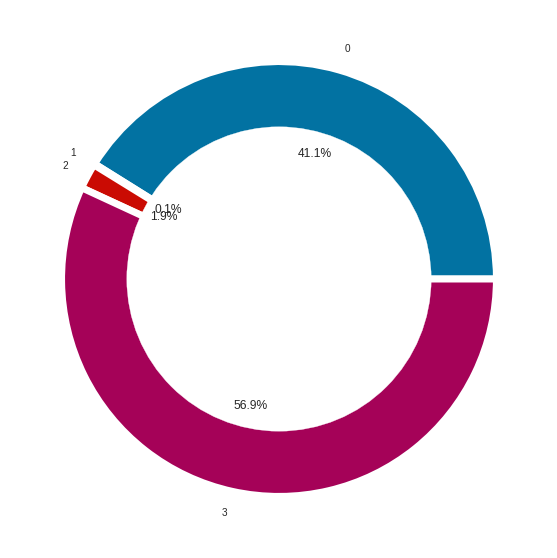

In [ ]:
#Revenue Chart
names = Total_Revenue['Cluster']
size = Total_Revenue['transaction']
plt.figure(figsize=(20, 10))
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(size, labels=names,
        autopct="%.1f%%",wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


#Correlation Analysis

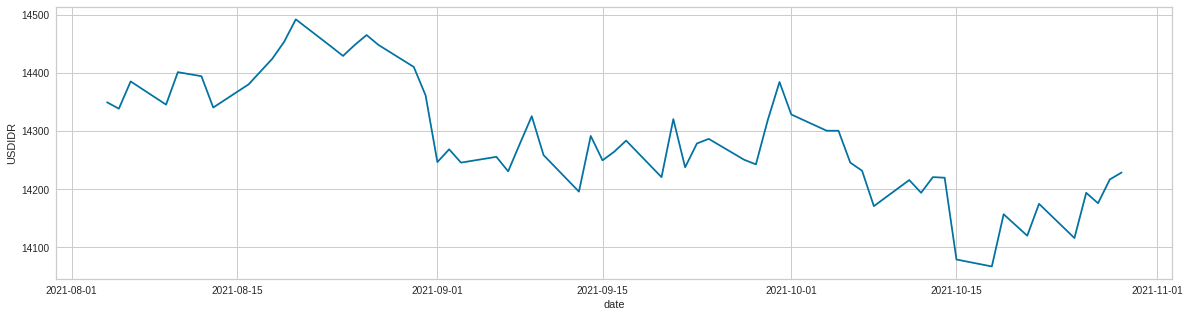

In [ ]:
plt.figure(figsize=(20,5))  
sns.lineplot(x="date",
            y="USDIDR", 
            data=merge_1, palette='deep');


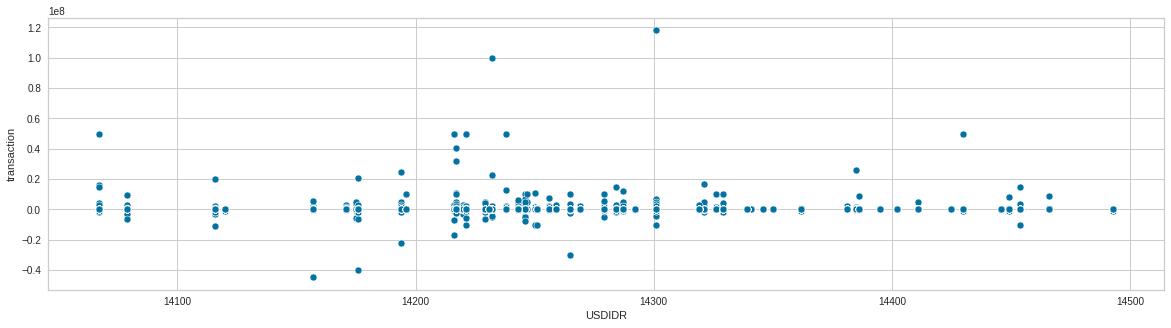

In [ ]:
plt.figure(figsize=(20,5))  
sns.scatterplot(x="USDIDR",
            y="transaction", 
            data=merge_1, palette='pastel');

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats #<< Stats
import math
from statsmodels.stats.weightstats import ztest #<< Stats
from scipy.stats import chisquare #<< Stats

x = merge_1['USDIDR']
y = merge_1['transaction']

(r,p_value) = stats.pearsonr(x, y)
print('correlation: ',r)
print('p-value:', p_value)

correlation:  0.0014580989365134793
p-value: 0.36498717168881084


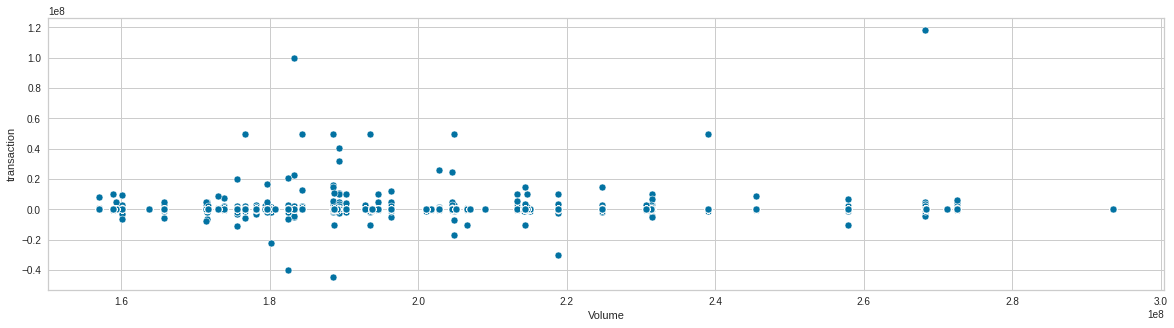

In [ ]:
plt.figure(figsize=(20,5))  
sns.scatterplot(x="Volume",
            y="transaction", 
            data=merge_1, palette='pastel');

In [ ]:
x = merge_1['Volume']
y = merge_1['transaction']

(r,p_value) = stats.pearsonr(x, y)
print('correlation: ',r)
print('p-value:', p_value)

correlation:  0.0018798911851828075
p-value: 0.2428233101990601


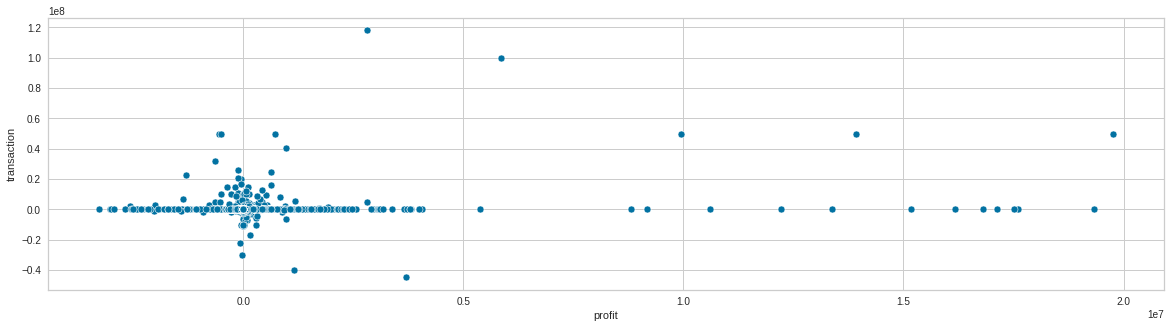

In [ ]:
plt.figure(figsize=(20,5))  
sns.scatterplot(x="profit",
            y="transaction", 
            data=merge_1, palette='pastel');

In [ ]:
x = merge_1['profit']
y = merge_1['transaction']

(r,p_value) = stats.pearsonr(x, y)
print('correlation: ',r)
print('p-value:', p_value)

correlation:  0.19029807251908037
p-value: 0.0


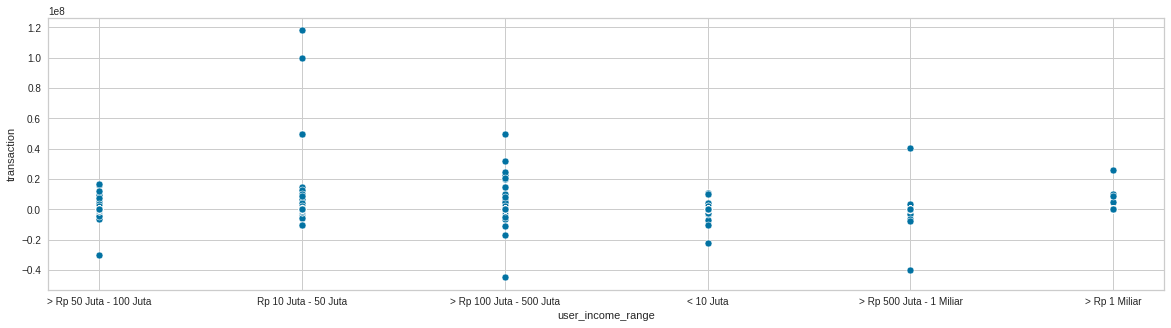

In [ ]:
plt.figure(figsize=(20,5))  
sns.scatterplot(x="user_income_range",
            y="transaction", 
            data=merge_1, palette='pastel');

#Customer churn Oktober

In [ ]:
sheet1_url = 'https://docs.google.com/spreadsheets/d/1UzvXHLxx8yNTS3_71fEqT50YSZmm9FH975J-jP9zWVE/edit#gid=289366647'
sheet1_url_trf = sheet1_url.replace('/edit#gid=','/export?format=csv&gid=')
d1 = pd.read_csv(sheet1_url_trf)
d1

,user_id,flag_order_bond,bond_units_ordered
0,50701,1,34
1,50961,1,99
2,51883,0,0
3,53759,0,0
4,54759,1,92
...,...,...,...
8479,4173878,0,0
8480,4174045,0,0
8481,4174169,0,0
8482,4174486,0,0


In [ ]:
d1['user_id'] = d1['user_id'].astype(str)
merge_1['user_id'] = merge_1['user_id'].astype(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#month 10

In [ ]:
df10 = merge_1[merge_1['month'] == 10] 
df_new=df10.merge(d1, how = 'inner', on='user_id')


In [ ]:
df_new

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,Adj_Close,Volume,USDIDR,flag_order_bond,bond_units_ordered
0,50701,2021-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji,6417.32,231440600,14246,1,34
1,50701,2021-10-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji,6416.40,183232100,14232,1,34
2,50701,2021-10-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji,6481.77,231302300,14171,1,34
3,50701,2021-10-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji,6459.70,204779900,14216,1,34
4,50701,2021-10-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,IRT,Rp 10 Juta - 50 Juta,0,Gaji,6486.27,204607300,14194,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169615,4174772,2021-10-28,10600.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,Pelajar,Rp 10 Juta - 50 Juta,used referral,Gaji,6524.08,189347200,14217,0,0
169616,4174772,2021-10-29,10698.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,Pelajar,Rp 10 Juta - 50 Juta,used referral,Gaji,6591.35,171512200,14229,0,0
169617,4174772,2021-10-01,10112.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,Pelajar,Rp 10 Juta - 50 Juta,used referral,Gaji,6228.85,190252600,14329,0,0
169618,4174772,2021-10-04,10385.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,Pelajar,Rp 10 Juta - 50 Juta,used referral,Gaji,6342.69,257881700,14301,0,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169620 entries, 0 to 169619
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              169620 non-null  object        
 1   date                                 169620 non-null  datetime64[ns]
 2   Saham_AUM                            169620 non-null  float64       
 3   Saham_invested_amount                169620 non-null  float64       
 4   Saham_transaction_amount             169620 non-null  float64       
 5   Pasar_Uang_AUM                       169620 non-null  float64       
 6   Pasar_Uang_invested_amount           169620 non-null  float64       
 7   Pasar_Uang_transaction_amount        169620 non-null  float64       
 8   Pendapatan_Tetap_AUM                 169620 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     169620 non-null  float64       
 

In [ ]:
df_new.drop(columns=['month'], inplace=True)


                 user_id
flag_order_bond         
0                   5015
1                   3466


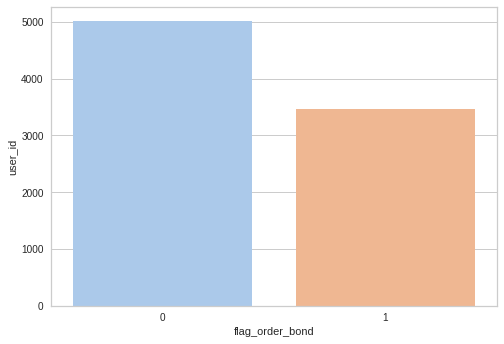

In [ ]:
grouped = df_new.groupby('flag_order_bond').agg('nunique')['user_id']
grouped = pd.DataFrame(grouped)
print(grouped)
# grouped
sns.barplot(x=grouped.index, y='user_id', data=grouped, palette='pastel')

          user_income_range  flag_order_bond
0                 < 10 Juta            25040
1             > Rp 1 Miliar              240
2  > Rp 100 Juta - 500 Juta             7800
3   > Rp 50 Juta - 100 Juta            12980
4  > Rp 500 Juta - 1 Miliar              620
5      Rp 10 Juta - 50 Juta            22640


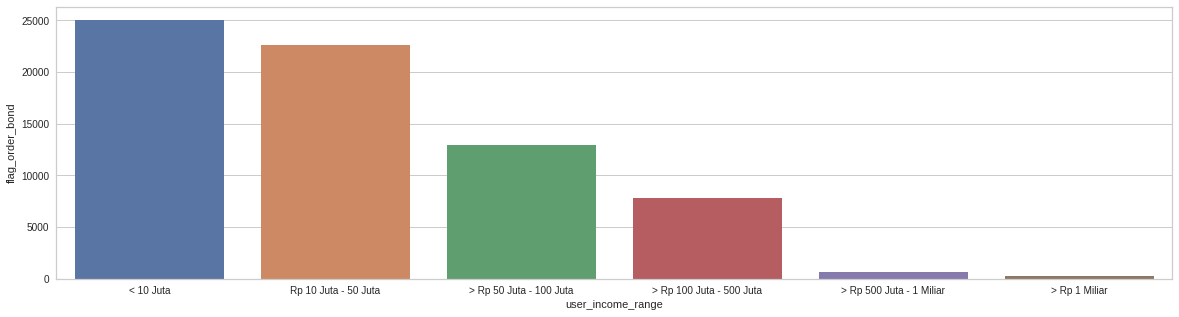

In [ ]:
plt.figure(figsize=(20,5))  

grouped1= df_new.groupby(['user_income_range'])['flag_order_bond'].sum()
grouped1=grouped1.reset_index()
print(grouped1)
# grouped
sns.barplot(x='user_income_range', y='flag_order_bond', data=grouped1, palette='deep',order=grouped1.sort_values('flag_order_bond',ascending = False).user_income_range)

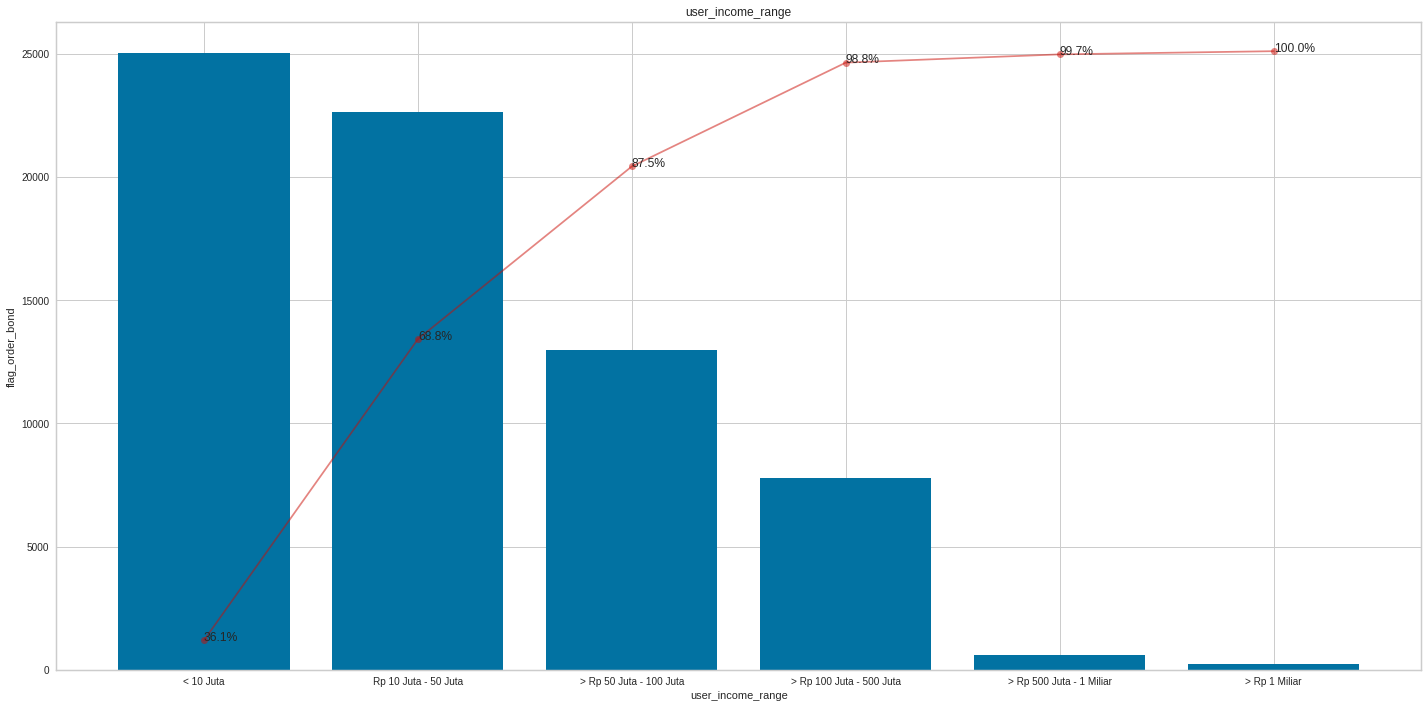

In [ ]:
def pareto_plot(grouped1, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0000001%}'):
    xlabel = x
    ylabel = y
    tmp = grouped1.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.02%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]))    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

pareto_plot(grouped1, x='user_income_range', y='flag_order_bond', title='user_income_range')

  user_occupation  flag_order_bond
0            Guru              660
1             IRT             4480
2          Others             6800
3             PNS             1500
4         Pelajar            34280
5       Pengusaha             3080
6       Pensiunan               60
7          Swasta            18240
8      TNI/Polisi              220


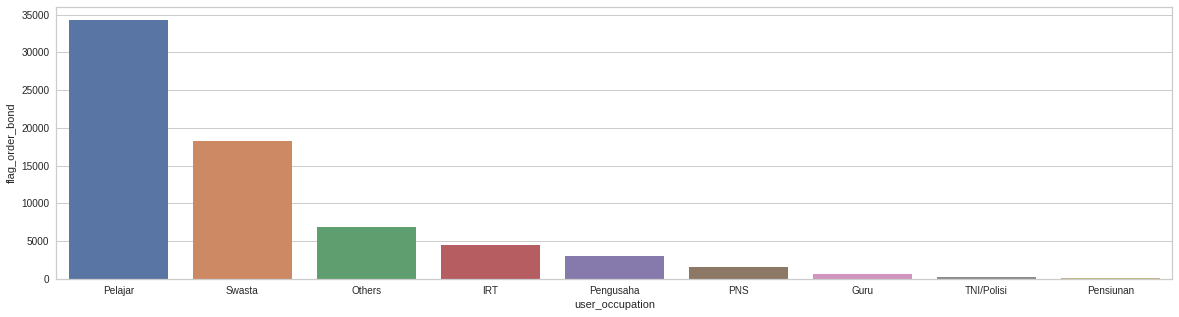

In [ ]:
plt.figure(figsize=(20,5))  
grouped2= df_new.groupby(['user_occupation'])['flag_order_bond'].sum()
grouped2=grouped2.reset_index()
print(grouped2)
# grouped
sns.barplot(x='user_occupation', y='flag_order_bond', data=grouped2, palette='deep',order=grouped2.sort_values('flag_order_bond',ascending = False).user_occupation)

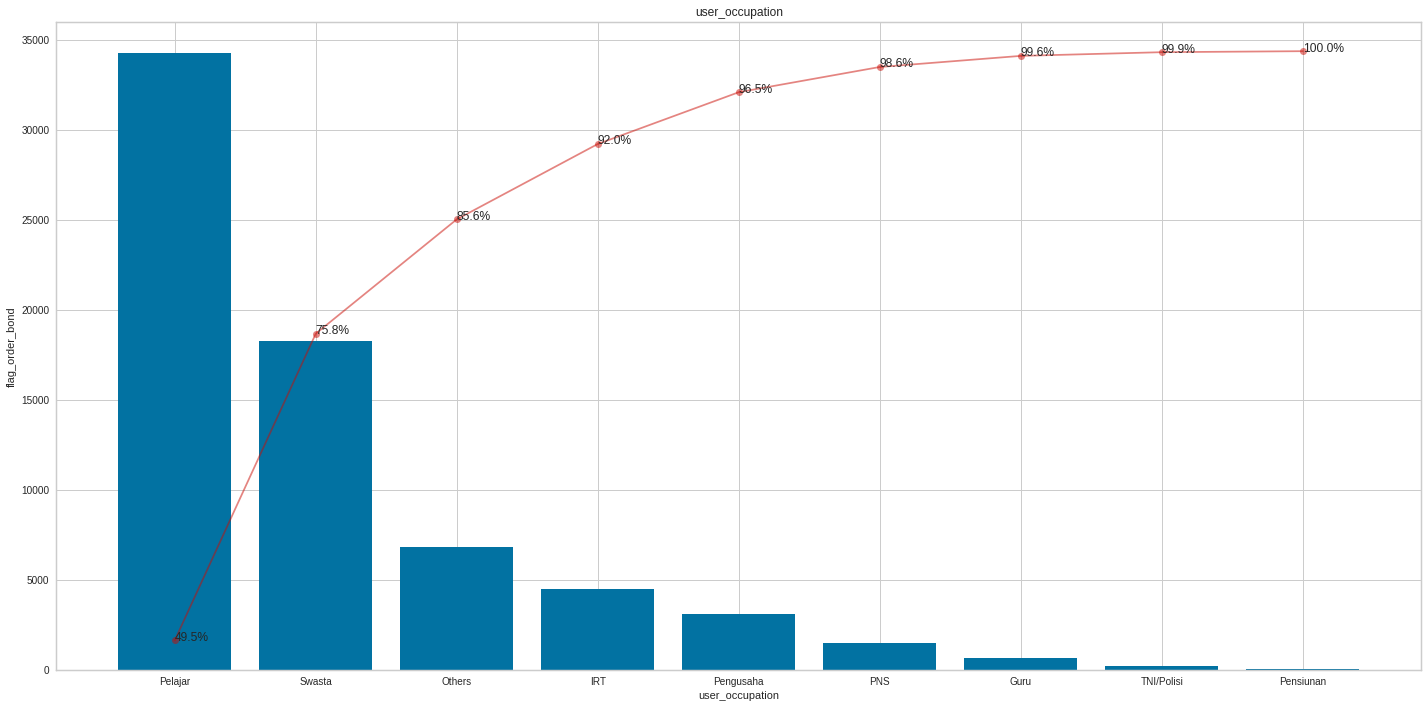

In [ ]:
def pareto_plot(grouped2, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0000001%}'):
    xlabel = x
    ylabel = y
    tmp = grouped2.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.02%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]))    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

pareto_plot(grouped2, x='user_occupation', y='flag_order_bond', title='user_occupation')

      user_income_source  flag_order_bond
0         Bunga Simpanan              120
1  Dari Orang Tua / Anak             4600
2     Dari Suami / istri              660
3                   Gaji            44960
4        Hasil Investasi              440
5      Keuntungan Bisnis             7360
6                Lainnya             1760
7               Tabungan             1820
8                 Undian             7400
9                Warisan              200


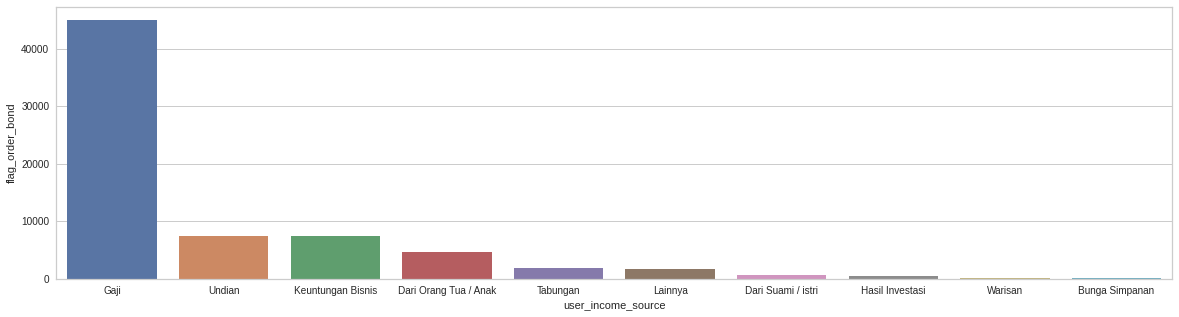

In [ ]:
plt.figure(figsize=(20,5))  
grouped3= df_new.groupby(['user_income_source'])['flag_order_bond'].sum()
grouped3=grouped3.reset_index()
print(grouped3)
# grouped
sns.barplot(x='user_income_source', y='flag_order_bond', data=grouped3, palette='deep',order=grouped3.sort_values('flag_order_bond',ascending = False).user_income_source)

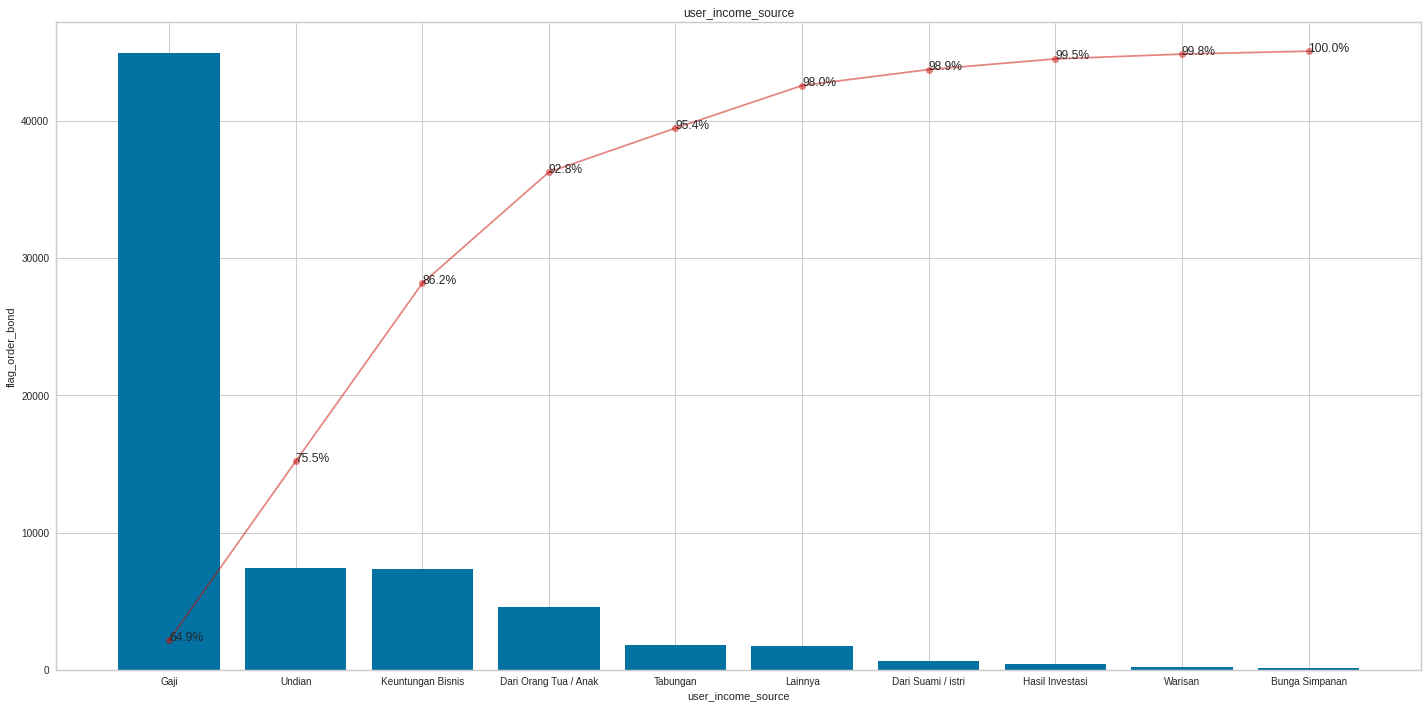

In [ ]:
def pareto_plot(grouped3, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0000001%}'):
    xlabel = x
    ylabel = y
    tmp = grouped3.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.02%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]))    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

pareto_plot(grouped3, x='user_income_source', y='flag_order_bond', title='user_income_source')

  user_gender  flag_order_bond
0      Female            30720
1        Male            38600


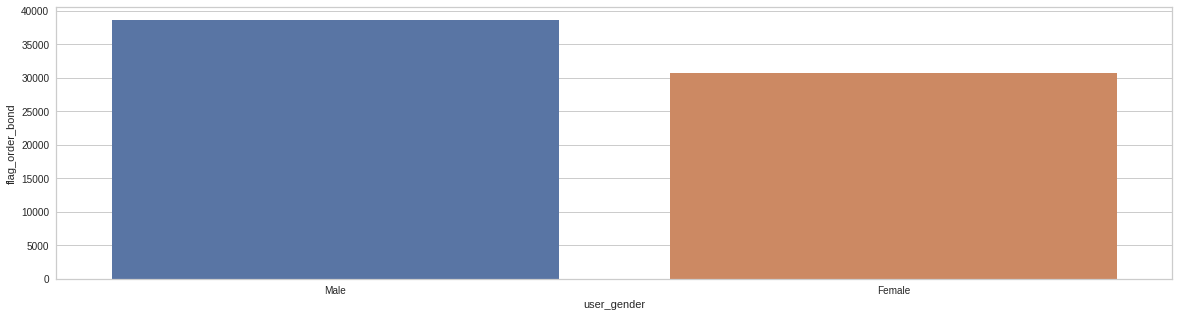

In [ ]:
plt.figure(figsize=(20,5)) 
grouped4= df_new.groupby(['user_gender'])['flag_order_bond'].sum()
grouped4=grouped4.reset_index()
print(grouped4)
# grouped
sns.barplot(x='user_gender', y='flag_order_bond', data=grouped4, palette='deep',order=grouped4.sort_values('flag_order_bond',ascending = False).user_gender)

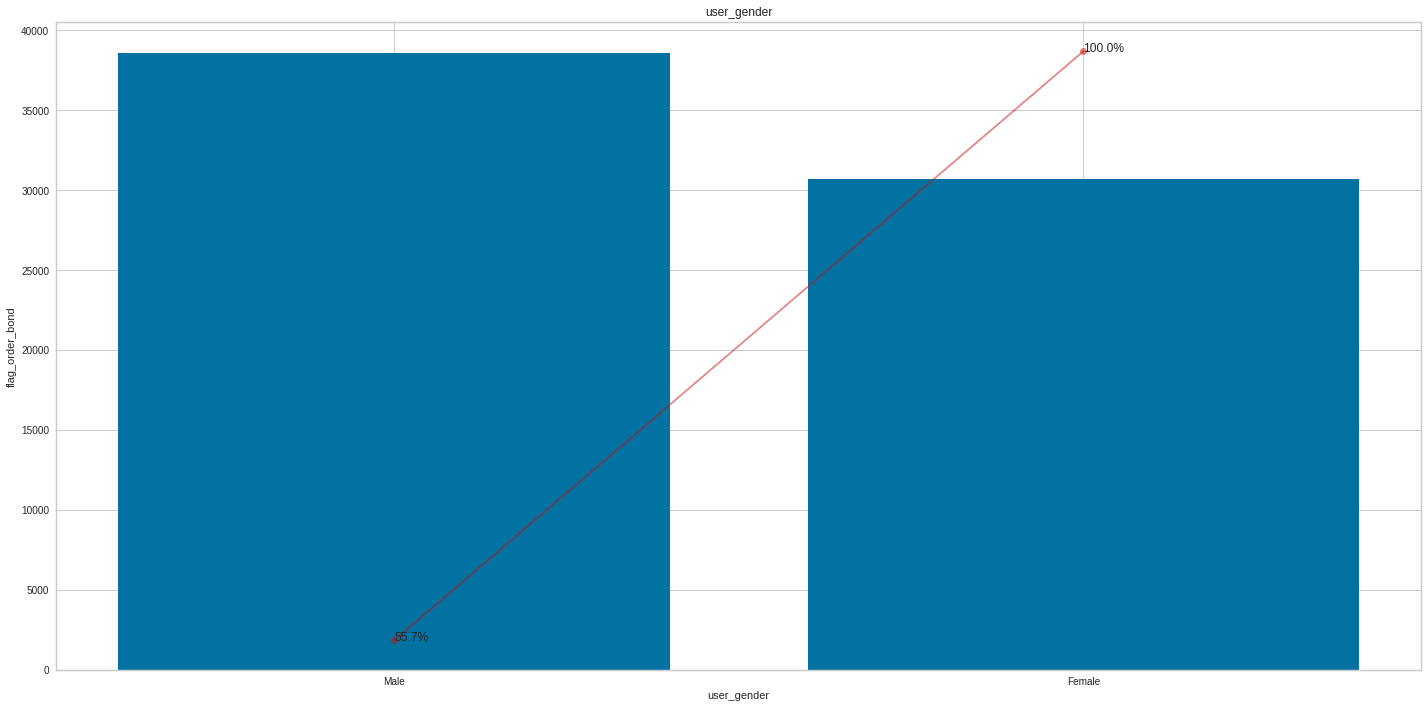

In [ ]:
def pareto_plot(grouped4, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0000001%}'):
    xlabel = x
    ylabel = y
    tmp = grouped4.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.02%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]))    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

pareto_plot(grouped4, x='user_gender', y='flag_order_bond', title='user_gender')

                                       flag_order_bond
user_occupation user_income_source                    
Guru            Dari Orang Tua / Anak               60
                Dari Suami / istri                  20
                Gaji                               520
                Keuntungan Bisnis                   60
                Lainnya                              0
...                                                ...
Swasta          Undian                             120
                Warisan                              0
TNI/Polisi      Gaji                               220
                Keuntungan Bisnis                    0
                Tabungan                             0

[66 rows x 1 columns]


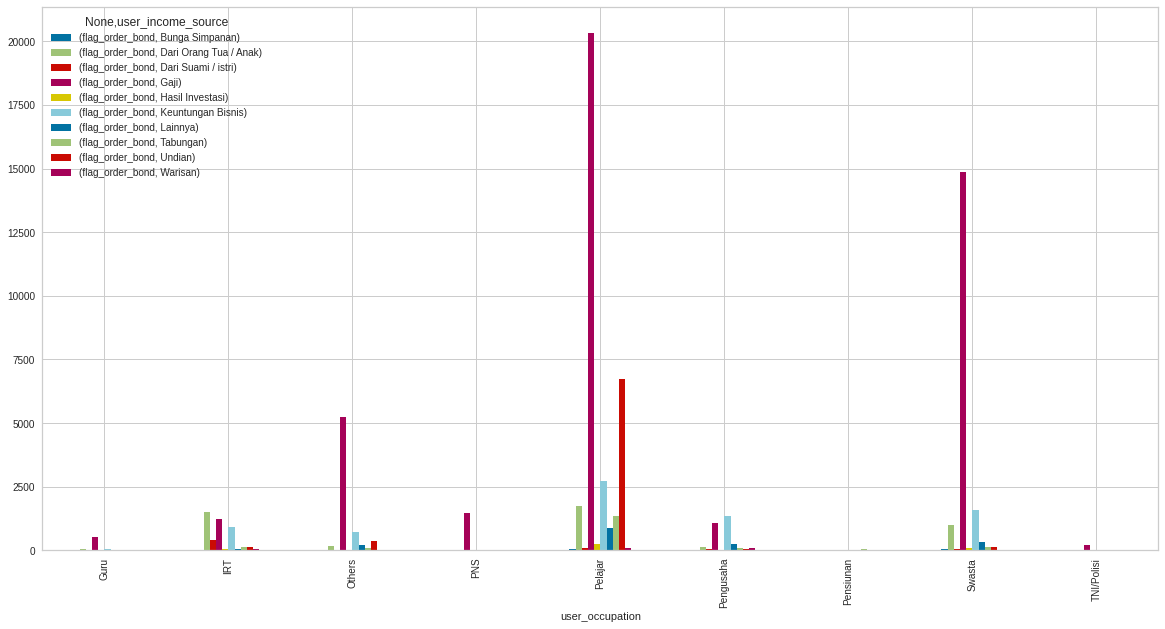

In [ ]:
grouped5 = pd.pivot_table(df_new, values=['flag_order_bond'], index=['user_occupation','user_income_source'], aggfunc='sum')

print(grouped5)
# grouped
grouped5.unstack().plot(kind='bar', stacked=False, figsize=(20, 10))

In [ ]:
grouped5.to_csv("grouped5.csv")

In [ ]:
# Dummy variable 
df_new =pd.get_dummies(data=df_new,columns=['user_occupation','user_income_range','user_income_source','user_gender'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169620 entries, 0 to 169619
Data columns (total 55 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   user_id                                     169620 non-null  object        
 1   date                                        169620 non-null  datetime64[ns]
 2   Saham_AUM                                   169620 non-null  float64       
 3   Saham_invested_amount                       169620 non-null  float64       
 4   Saham_transaction_amount                    169620 non-null  float64       
 5   Pasar_Uang_AUM                              169620 non-null  float64       
 6   Pasar_Uang_invested_amount                  169620 non-null  float64       
 7   Pasar_Uang_transaction_amount               169620 non-null  float64       
 8   Pendapatan_Tetap_AUM                        169620 non-null  float64      

In [ ]:
# Ambil semua kolom yang tipenya sudah numerik
corr_column = df_new.select_dtypes(include=[np.number]).columns.to_list()
corr_column = list(set(corr_column) - set(['flag_order_bond']))
corr_column

['Pasar_Uang_transaction_amount',
 'Campuran_transaction_amount',
 'Saham_invested_amount',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_< 10 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'profit_saham',
 'user_income_source_Gaji',
 'Campuran_invested_amount',
 'user_age',
 'Adj_Close',
 'week',
 'Saham_transaction_amount',
 'user_occupation_Guru',
 'user_occupation_PNS',
 'user_occupation_Pelajar',
 'user_income_source_Hasil Investasi',
 'user_gender_Male',
 'user_occupation_Pengusaha',
 'Pasar_Uang_AUM',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_income_source_Dari Suami / istri',
 'user_gender_Female',
 'bond_units_ordered',
 'Pendapatan_Tetap_invested_amount',
 'Pasar_Uang_invested_amount',
 'USDIDR',
 'user_income_source_Warisan',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'user_occupation_Pensiunan',
 'Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_transaction_amount',
 'user_occupation_IRT',
 'user_occupation_Swasta',
 'user_income_range_> Rp

In [ ]:
len(corr_column)

51

In [ ]:
df_new[corr_column]

,Pasar_Uang_transaction_amount,Campuran_transaction_amount,Saham_invested_amount,user_income_range_> Rp 100 Juta - 500 Juta,user_income_range_< 10 Juta,user_income_range_> Rp 50 Juta - 100 Juta,profit_saham,user_income_source_Gaji,Campuran_invested_amount,user_age,...,transaction,user_income_source_Keuntungan Bisnis,user_income_source_Undian,profit_pasar_uang,Saham_AUM,Campuran_AUM,user_occupation_TNI/Polisi,user_income_source_Dari Orang Tua / Anak,user_income_source_Bunga Simpanan,profit
0,0.0,0.0,0.0,0,0,0,0.0,1,10000000.0,28,...,0.0,0,0,0.0,0.0,9523662.0,0,0,0,0.0
1,0.0,0.0,0.0,0,0,0,0.0,1,10000000.0,28,...,0.0,0,0,0.0,0.0,9449393.0,0,0,0,0.0
2,0.0,0.0,0.0,0,0,0,0.0,1,10000000.0,28,...,0.0,0,0,0.0,0.0,9537628.0,0,0,0,0.0
3,0.0,0.0,0.0,0,0,0,0.0,1,10000000.0,28,...,0.0,0,0,0.0,0.0,9507851.0,0,0,0,0.0
4,0.0,0.0,0.0,0,0,0,0.0,1,10000000.0,28,...,0.0,0,0,0.0,0.0,9514734.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169615,0.0,0.0,10000.0,0,0,0,600.0,1,0.0,28,...,0.0,0,0,0.0,10600.0,0.0,0,0,0,0.0
169616,0.0,0.0,10000.0,0,0,0,698.0,1,0.0,28,...,0.0,0,0,0.0,10698.0,0.0,0,0,0,0.0
169617,0.0,0.0,10000.0,0,0,0,112.0,1,0.0,28,...,0.0,0,0,0.0,10112.0,0.0,0,0,0,0.0
169618,0.0,0.0,10000.0,0,0,0,385.0,1,0.0,28,...,0.0,0,0,0.0,10385.0,0.0,0,0,0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


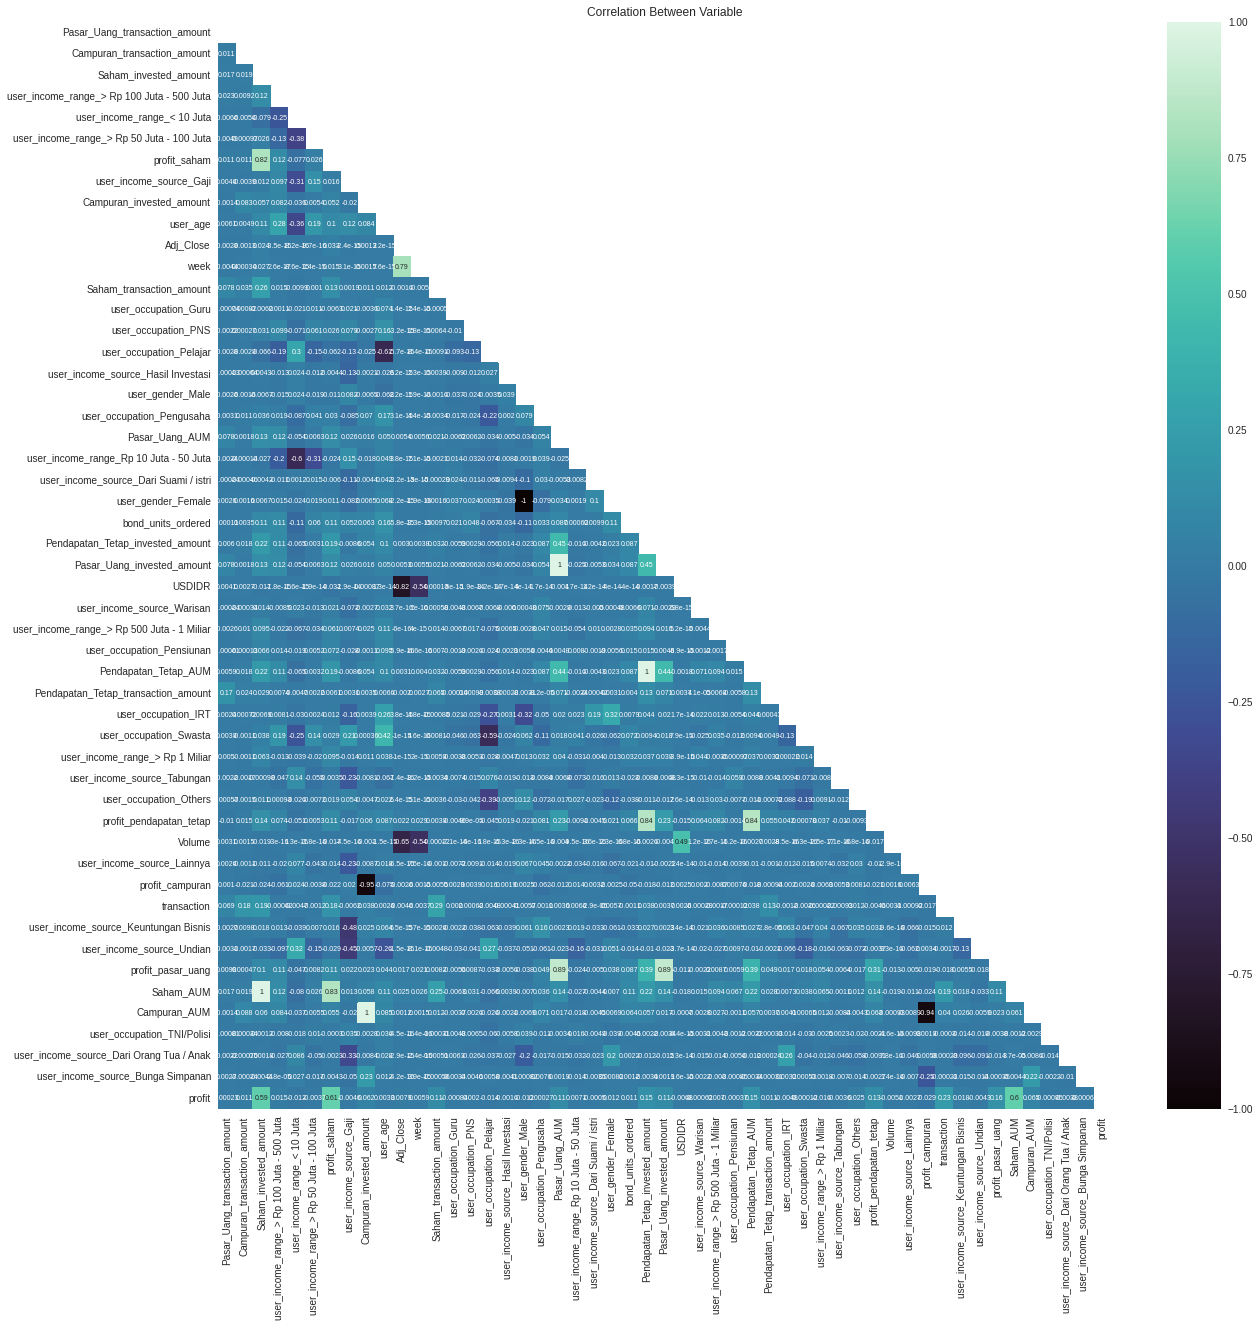

In [ ]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    df_new[corr_column].corr(), dtype=np.bool))

sns.heatmap(df_new[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":7})

plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = df_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['Saham_invested_amount',
 'Pasar_Uang_invested_amount',
 'Pendapatan_Tetap_invested_amount',
 'Campuran_invested_amount',
 'profit_saham',
 'profit_pendapatan_tetap',
 'profit_pasar_uang',
 'profit_campuran',
 'USDIDR',
 'bond_units_ordered',
 'user_gender_Male']

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['Pasar_Uang_transaction_amount',
 'Campuran_transaction_amount',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_< 10 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'user_income_source_Gaji',
 'user_age',
 'Adj_Close',
 'user_occupation_Guru',
 'user_occupation_Pelajar',
 'user_occupation_PNS',
 'week',
 'Saham_transaction_amount',
 'user_income_source_Hasil Investasi',
 'user_occupation_Pengusaha',
 'Pasar_Uang_AUM',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_income_source_Dari Suami / istri',
 'user_gender_Female',
 'user_income_source_Warisan',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'user_occupation_Pensiunan',
 'Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_transaction_amount',
 'user_occupation_IRT',
 'user_occupation_Swasta',
 'user_income_range_> Rp 1 Miliar',
 'user_income_source_Tabungan',
 'user_occupation_Others',
 'Volume',
 'user_income_source_Lainnya',
 'transaction',
 'user_income_source_Keuntungan Bisnis',
 'user_income_source_Undi

In [ ]:
len(to_keep)

40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


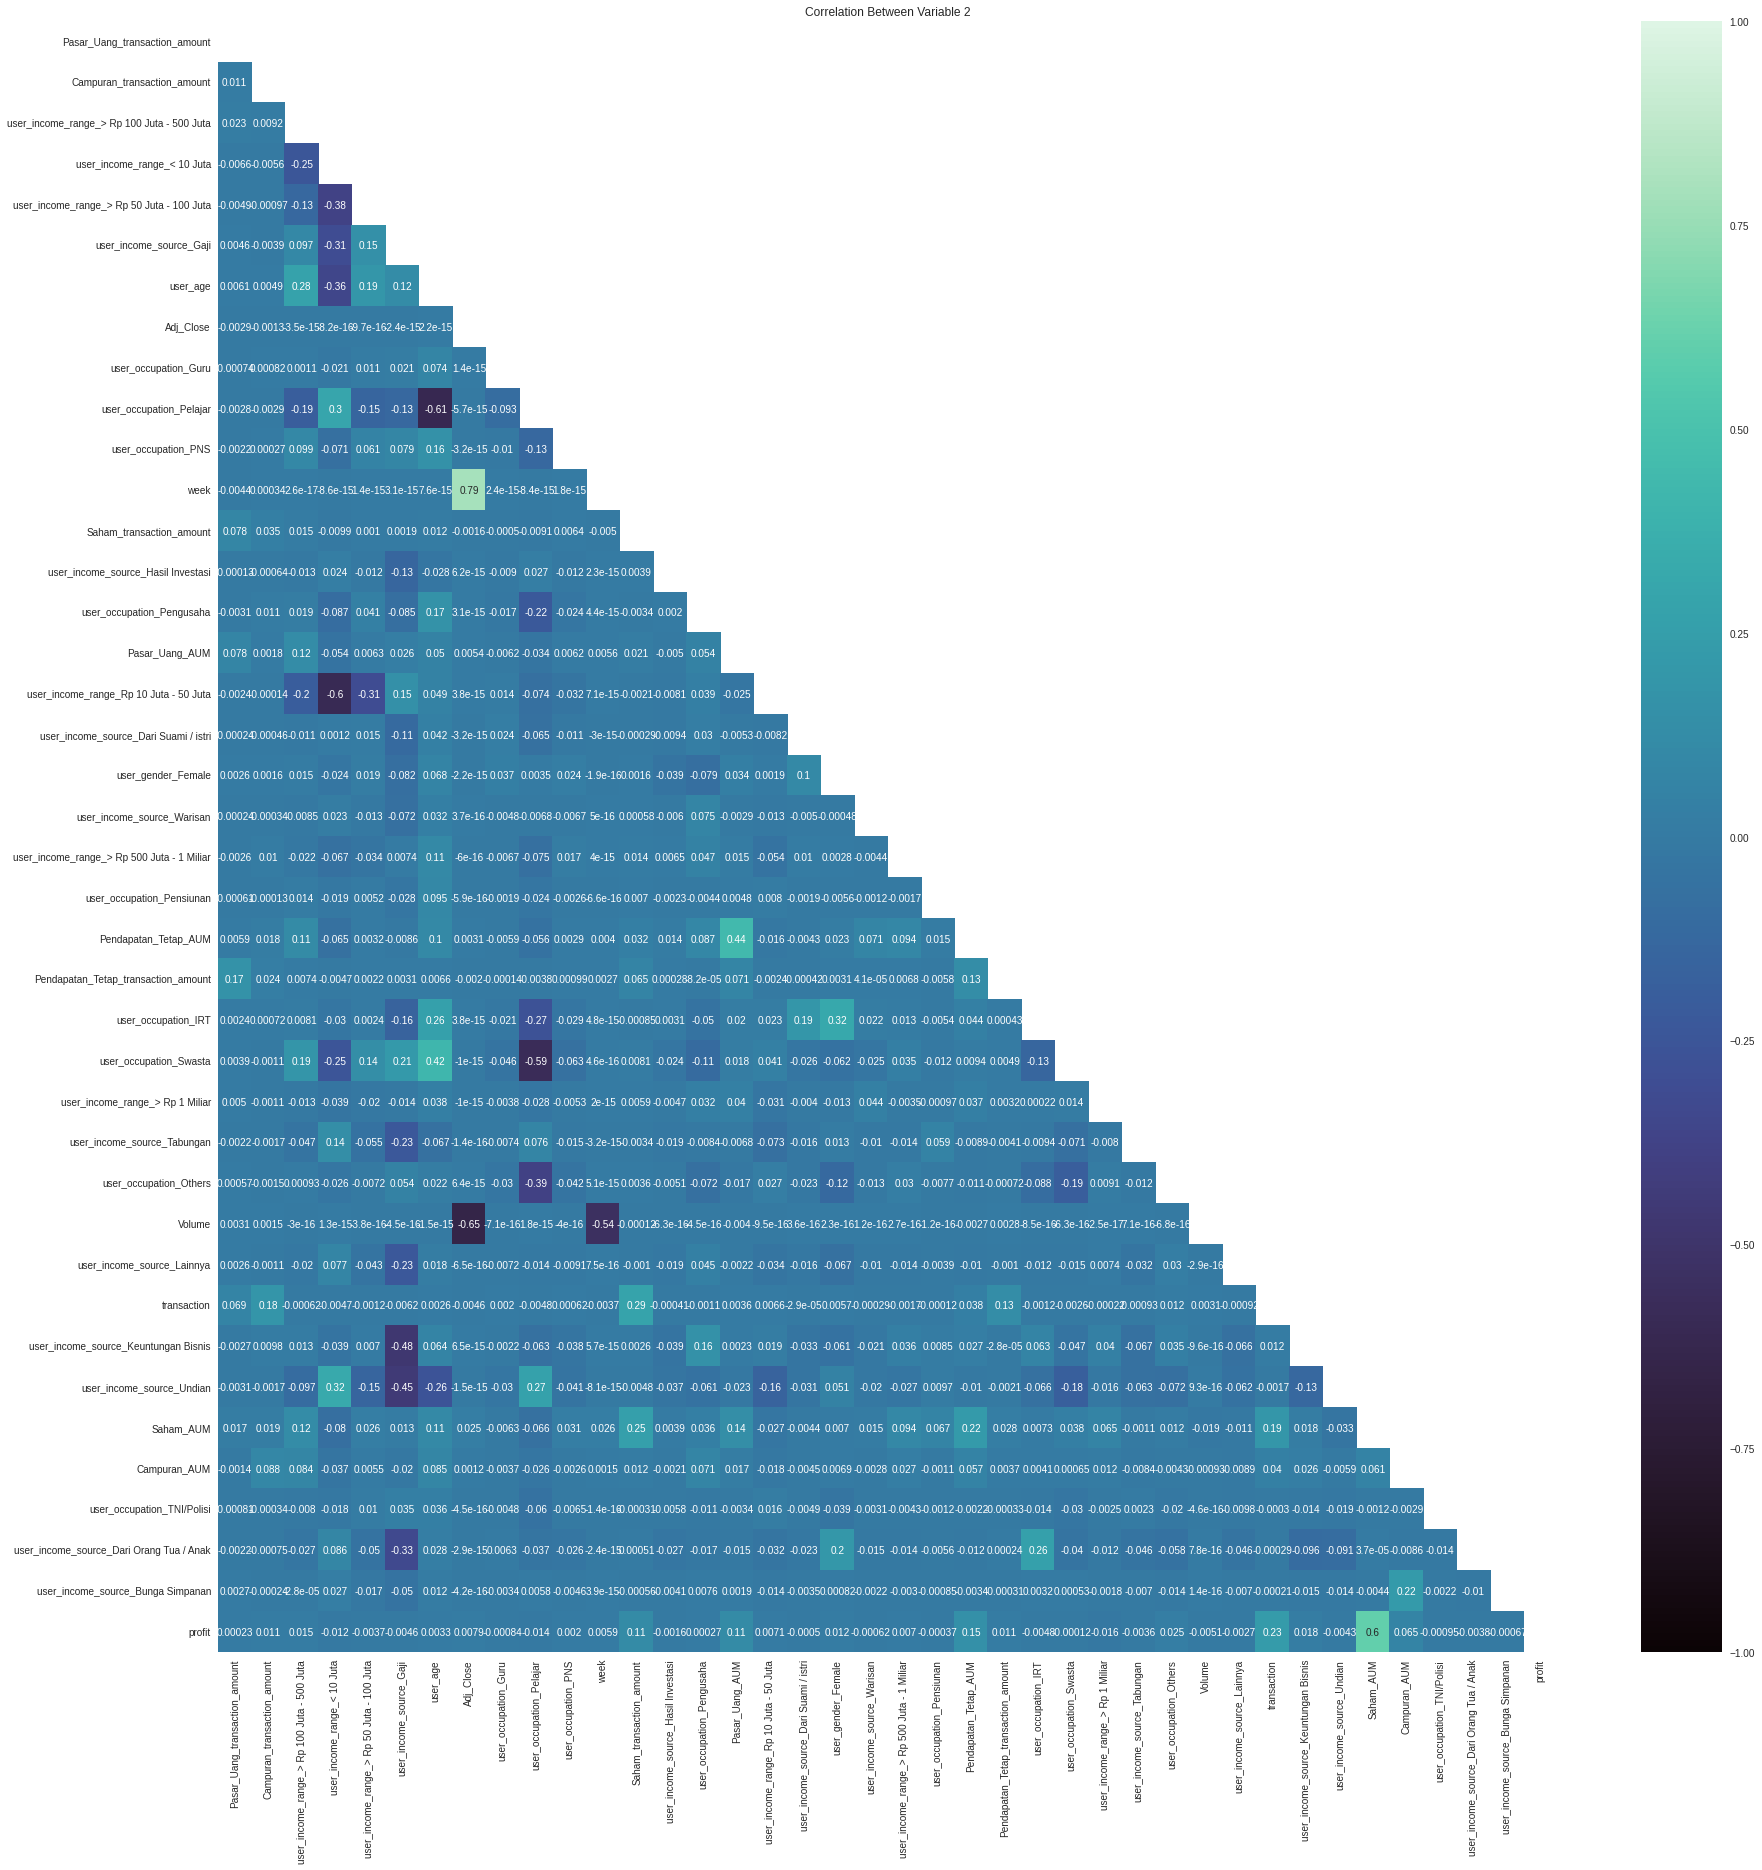

In [ ]:
corr_column_new = to_keep

fig = plt.figure(figsize=(30,30))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable 2')

mask = np.triu(np.ones_like(
    df_new[corr_column_new].corr(), dtype=np.bool))
sns.heatmap(df_new[corr_column_new].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":10})

plt.show()

#Logistic Regression

In [ ]:
# Separate flag_order_bond from other variables
to_keep_vars = list(set(to_keep) - set(['flag_order_bond']))
to_keep_vars

['Pasar_Uang_transaction_amount',
 'Campuran_transaction_amount',
 'user_income_range_> Rp 100 Juta - 500 Juta',
 'user_income_range_> Rp 50 Juta - 100 Juta',
 'user_income_range_< 10 Juta',
 'user_income_source_Gaji',
 'user_age',
 'Adj_Close',
 'week',
 'user_occupation_PNS',
 'user_occupation_Guru',
 'user_occupation_Pelajar',
 'Saham_transaction_amount',
 'user_income_source_Hasil Investasi',
 'user_occupation_Pengusaha',
 'Pasar_Uang_AUM',
 'user_income_range_Rp 10 Juta - 50 Juta',
 'user_income_source_Dari Suami / istri',
 'user_gender_Female',
 'user_income_source_Warisan',
 'user_income_range_> Rp 500 Juta - 1 Miliar',
 'user_occupation_Pensiunan',
 'Pendapatan_Tetap_AUM',
 'Pendapatan_Tetap_transaction_amount',
 'user_occupation_IRT',
 'user_occupation_Swasta',
 'user_income_range_> Rp 1 Miliar',
 'user_income_source_Tabungan',
 'user_occupation_Others',
 'Volume',
 'user_income_source_Lainnya',
 'user_income_source_Keuntungan Bisnis',
 'transaction',
 'user_income_source_Undi

In [ ]:
from sklearn.model_selection import train_test_split

# Define the whole data
x = df_new[to_keep_vars]
y = df_new[['flag_order_bond']]

# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
# Check split result
for d1 in [x_training, x_test, y_training, y_test]:
  print(d1.shape)

(135696, 40)
(33924, 40)
(135696, 1)
(33924, 1)


In [ ]:
135744/(135744+33936)

0.8

In [ ]:
# Check class balance in each datasets
for d1 in [y_training,y_test]:
  df2 = d1.value_counts()
  print(df2)

flag_order_bond
0                  80193
1                  55503
dtype: int64
flag_order_bond
0                  20107
1                  13817
dtype: int64


In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_training, y_training)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model.score(x_training, y_training)

0.6322809810163896

#confusion matrix

In [ ]:
# confusion_matrix(flag_order_bond actual, flag_order_bond prediksi)
confusion_matrix(y_training, model.predict(x_training))

array([[77731,  2462],
       [47436,  8067]])

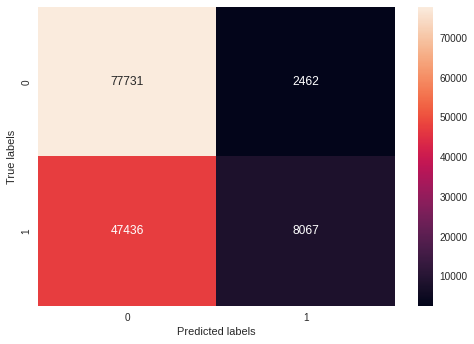

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(x_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not flag_order_bond','flag_order_bond']))

                     precision    recall  f1-score   support

Not flag_order_bond       0.62      0.97      0.76     80193
    flag_order_bond       0.77      0.15      0.24     55503

           accuracy                           0.63    135696
          macro avg       0.69      0.56      0.50    135696
       weighted avg       0.68      0.63      0.55    135696



# Check performance on the test set


In [ ]:
model.score(x_test, y_test)

0.6312050465746963

In [ ]:
confusion_matrix(y_test, model.predict(x_test))

array([[19470,   637],
       [11874,  1943]])

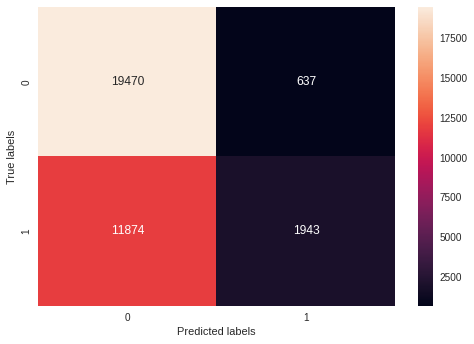

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_training, model.predict(x_training), target_names=['Not flag_order_bond','flag_order_bond']))

                     precision    recall  f1-score   support

Not flag_order_bond       0.62      0.97      0.76     80193
    flag_order_bond       0.77      0.15      0.24     55503

           accuracy                           0.63    135696
          macro avg       0.69      0.56      0.50    135696
       weighted avg       0.68      0.63      0.55    135696



# Benefit-Cost Analysis


In [ ]:
df_new

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,user_income_source_Dari Suami / istri,user_income_source_Gaji,user_income_source_Hasil Investasi,user_income_source_Keuntungan Bisnis,user_income_source_Lainnya,user_income_source_Tabungan,user_income_source_Undian,user_income_source_Warisan,user_gender_Female,user_gender_Male
0,50701,2021-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,50701,2021-10-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,50701,2021-10-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,50701,2021-10-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,50701,2021-10-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169615,4174772,2021-10-28,10600.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
169616,4174772,2021-10-29,10698.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
169617,4174772,2021-10-01,10112.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
169618,4174772,2021-10-04,10385.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
y

,flag_order_bond
0,1
1,1
2,1
3,1
4,1
...,...
169615,0
169616,0
169617,0
169618,0


In [ ]:
predicted_prob = model.predict_proba(x)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

,predicted_score
0,0.461003
1,0.491244
2,0.461253
3,0.477999
4,0.478190
...,...
169615,0.380316
169616,0.391253
169617,0.379745
169618,0.339491


In [ ]:
# Get 30% threshold
pct30_threshold = predicted_prob['predicted_score'].quantile(0.7) 

# Get top 30% customers
pct30_customer = predicted_prob[predicted_prob['predicted_score'] > pct30_threshold]

# Merge with actual flag_order_bond outcome 
pct30_customer = pct30_customer.merge(y, left_index = True, right_index = True)
pct30_customer

,predicted_score,flag_order_bond
0,0.461003,1
1,0.491244,1
2,0.461253,1
3,0.477999,1
4,0.478190,1
...,...,...
169547,0.399867,0
169551,0.396377,0
169567,0.398285,0
169587,0.398031,0


In [ ]:
pct30_customer['flag_order_bond'].value_counts()

1    30530
0    20356
Name: flag_order_bond, dtype: int64

Now, imagine that


- cost of campaign per customer: \$100
- loss if customer churn: $50
- potential profit if customer churn not churn: \$250

Then the return of the campaign is:

Return = (Benefit of preventing churn) - (Loss if churn happened) - (Cost of marketing campaign) 



In [ ]:
(250*30577) - (50*20327) - (100*50904)

1537500

In [ ]:
profit_total

,profit
month,
10,505092734.0


In [ ]:
total_user=df_new['user_id'].nunique()
total_user

8481

In [ ]:
allocation_promo=30/100*505092734/total_user
allocation_promo

17866.739794835514